# 1. Introduction

### Project Overview

This project analyzes video game sales and associated data to identify patterns that determine a game's success. The dataset contains information on user and critic reviews, game genres, platforms (e.g., Xbox, PlayStation), and sales figures across various regions (North America, Europe, Japan, and other countries). It also includes content ratings assigned by the Entertainment Software Rating Board (ESRB).

The goal is to uncover actionable insights that can inform marketing strategies and identify potentially profitable platforms, genres, and regions. By analyzing historical data up to 2016, we aim to make data-driven recommendations for planning a successful advertising campaign in 2017.

This project takes a comprehensive approach, combining data cleaning, visualization, statistical analysis, and hypothesis testing to deliver insights that can inform game release strategies and marketing decisions.

### Dataset Overview

The dataset includes:

- **Name**: Game title.
- **Platform**: Platform or console (e.g., Xbox, PlayStation, PC).
- **Year_of_Release**: Year the game was released.
- **Genre**: Game category (e.g., Shooter, RPG, Action).
- **NA_sales**: Sales in North America (in millions of USD).
- **EU_sales**: Sales in Europe (in millions of USD).
- **JP_sales**: Sales in Japan (in millions of USD).
- **Other_sales**: Sales in other regions (in millions of USD).
- **Critic_Score**: Average critic score (out of 100).
- **User_Score**: Average user score (out of 10).
- **Rating**: ESRB content rating (e.g., E, T, M).

Since the dataset for 2016 may be incomplete, earlier data trends are used to build a foundation for forecasting and planning for 2017.

### Steps and Approach

1. **Data Exploration**
    - Loaded the dataset and examined its structure, column names, and data types.
    - Investigated missing values, irregularities, and general patterns within the dataset.

2. **Data Preparation**
    - Standardized column naming conventions for consistency.
    - Converted columns to appropriate formats to facilitate accurate computations.
    - Addressed missing values using thoughtful imputation strategies:
        - Replaced placeholders like "TBD" with NaN.
        - Applied statistical measures such as medians to fill in gaps for numerical data.
    - Calculated total global sales as a sum of regional sales, introducing a new column total_sales.

3. **Data Analysis**
    - Studied trends in game releases by year to determine the relevance of the dataset for different timeframes.
    - Analyzed platform-specific performance to identify platforms with the highest sales and their growth or decline over time.
    - Created visualizations such as box plots to compare global sales distributions across platforms.
    - Examined correlations between review scores (critic and user) and sales for selected platforms, using scatter plots and statistical measures.
    - Explored the profitability of various game genres, identifying the most lucrative ones.

4. **Regional Sales Profiles**
    - Profiled user preferences in North America (NA), Europe (EU), and Japan (JP):
        - Determined the top five platforms for each region and analyzed market share variations.
        - Identified the top five genres and compared regional preferences.
        - Investigated the effect of ESRB ratings on sales in different regions.

5. **Hypothesis Testing**
    - Formulated and tested hypotheses to explore trends in user preferences:
        - Assessed whether average user ratings for Xbox One and PC platforms are statistically equivalent.
        - Evaluated whether average user ratings differ significantly between Action and Sports genres.
    - Applied t-tests with a significance level of 0.05 to assess hypotheses and provide evidence-based conclusions.

6. **Final Conclusions**
    - Summarized key findings across platforms, genres, and regional trends.
    - Highlighted actionable insights for boosting sales through effective platform selection, genre targeting, and regional campaigns.
    - Provided data-backed recommendations for optimizing advertising strategies in 2017.


# 2. Initialization

### A. Load Libraries and Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import ttest_ind, pearsonr
from scipy.stats import f_oneway

In [2]:
# Load the data
df = pd.read_csv('games.csv')

### B. General overview of the data

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 3. Data Pre-Processing

### A. Standardizing column names and handling missing values

In [5]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Check for columns with missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Convert `year_of_release` and force coerce `user_score` to convert the column to float datatype.

In [7]:
# Convert 'year_of_release' to integer
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Convert 'user_score' to numeric and handle 'TBD'
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

Recheck for missing values

In [8]:
# Recheck missing values
print(f"Missing values in 'year_of_release': {df['year_of_release'].isna().sum()}")
print(f"Missing values in 'critic_score': {df['critic_score'].isna().sum()}")
print(f"Missing values in 'user_score': {df['user_score'].isna().sum()}")

Missing values in 'year_of_release': 269
Missing values in 'critic_score': 8578
Missing values in 'user_score': 9125


In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Opt to remove rows with missing values in `name` and `year_of_release` columns for the following reasons:
- Unable to deduce name of game where missing, removing the 2 missing rows would have no impact to the overall games analytics.
- Unable to deduce the year of release for game, and as the count of missing values seems rather insignificant in comparison to the total count of games.

In [10]:
# Remove rows with missing values in name and year_of_release columns
df.dropna(subset=['name', 'year_of_release'], inplace=True)

In [11]:
# Fill missing values in rating column with 'No rating'
df['rating'] = df['rating'].fillna('No rating')

In [12]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [13]:
df.head().sort_values(by=['year_of_release', 'name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E


Looking at the above display of dataset (head), and the count of missing values in both critic_score and user_score, it somewhat gives an impression that there may be instances where both critic_score and user_score may have missing values and thereby resulting in rating value to be "No rating". 

Let's check to see how many rows in the dataset have both critic_score and user_score missing in comparison rating column.

In [14]:
# Check for rows where both `critic_score` and `user_score` have missing values
filtered_rows = df[(df['critic_score'].isnull()) & (df['user_score'].isnull()) & (df['rating'] == 'No rating')]

print("Rows with missing values in both critic_score and user_score, and No rating in rating:")
filtered_rows

Rows with missing values in both critic_score and user_score, and No rating in rating:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No rating
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,No rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No rating
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No rating


In [15]:
# Count rows meeting the conditions
no_ratings = (df['rating'] == 'No rating').sum()
count_three_missing = ((df['rating'] == 'No rating') & df['critic_score'].isnull() & df['user_score'].isnull()).sum()
count_two_missing = (df['critic_score'].isnull() & df['user_score'].isnull()).sum()
missing_critic_score = (df['critic_score'].isnull()).sum()
missing_user_score = (df['user_score'].isnull()).sum()

print(f"Number of rows with 'No rating': {no_ratings}")
print(f"Number of rows with 'No rating' and missing critic_score and user_score: {count_three_missing}")
print(f"Number of rows with missing critic_score and user_score: {count_two_missing}")

comparison_df = pd.DataFrame(
    {
        'Description': [
            "No rating rows",
            "Missing critic_score and user_score",
            "Missing critic_score and user_score with No Rating",
            "Missing critic_score and user_score with Rating",
            "Missing critic_score only",
            "Outstanding missing critic_score",
            "Missing user_score only",
            "Outstanding missing user_score"
        ],
        'Count':[
            no_ratings,
            count_two_missing,
            count_three_missing,
            count_two_missing - count_three_missing,
            missing_critic_score,
            missing_critic_score - count_three_missing,
            missing_user_score,
            missing_user_score - count_three_missing,
        ]
    }
)

comparison_df

Number of rows with 'No rating': 6676
Number of rows with 'No rating' and missing critic_score and user_score: 6580
Number of rows with missing critic_score and user_score: 7892


,Description,Count
0,No rating rows,6676
1,Missing critic_score and user_score,7892
2,Missing critic_score and user_score with No Ra...,6580
3,Missing critic_score and user_score with Rating,1312
4,Missing critic_score only,8461
5,Outstanding missing critic_score,1881
6,Missing user_score only,8981
7,Outstanding missing user_score,2401


From this inspection, it seems like almost all the No rating for ESRB have corresponding missing critic and user score. Which implies that, should we decide to delete the rows with missing values in critic and user score, we will be losing at least 6000 plus useful dataset that can significantly impact this project's analysis and inferences. Alternatively, if decided to use median value for the median score in respective columns, since the number of rows impacted here is about half of the dataset population, this would significantly impact inferences to be made as decisions would be significantly based on manipulated data and not original data.

It is better to leave the missing values in these columns in place and handle whenever required during analysis, in order not to lose useful or adulterate data for game analysis.

<hr>

Checking to confirm whether missing values still exist in the respective columns.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [17]:
df[df.isna().any(axis=1)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No rating
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,No rating


All missing values have now been treated. Next to handle the datatype for columns.
- Converting `year_of_release` datatype from float to integer.


### B. Handling Column Datatypes

Convert `year_of_release` datatype from floan to integer

In [18]:
# Convert columns to specific data types
df["year_of_release"] = df["year_of_release"].astype(int)  # Convert year_of_release to integer

In [19]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating


### C. Create new column for `total_sales`

In [21]:
# Creating a new column for total sales
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [22]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38


### C. Handle Duplicates

A duplicate instance for a game would be based on `name`, `platform` and `year_of_release` match. Will check for duplicates based on this criteria.

In [23]:
# Check for duplicates based on 'name', 'platform', and 'year_of_release'
duplicates = df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)

# Display all occurrences of duplicated rows
print("Duplicate rows based on 'name', 'platform', and 'year_of_release':")
df[duplicates]


Duplicate rows based on 'name', 'platform', and 'year_of_release':


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Comparison of both instance of duplicated entry, as the value of sales in duplicate entry with index 16230 tends to zero, with all other fields matching with initial instance of game, there may not be a significant impact as such with removing this duplicated instance at index 16230. 

Will proceed with removing the duplicate.

In [24]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### D. Conclusion

The Data Preparation phase ensured the dataset was clean, consistent, and ready for analysis by addressing key issues:

1. Standardized Column Names:
    - Converted all column names to lowercase for uniformity and easier handling.

2. Corrected Data Types:
    - Converted critic_score and user_score to numeric formats.
    - Ensured proper formatting of columns like year_of_release and platform.
    
3. Handled Missing Values and Placeholders:
     - Replaced missing ESRB ratings with 'No rating'.
     - Replaced invalid placeholders like "TBD" in user_score with NaN. This would ensure consistent processing during statistical and visualization operations
     - Assessed and determined missing values in to be maintained and handled when required, in order not to lose useful data for game analysis.
     
4. Created New Metrics:
    - Added a total_sales column by summing regional sales (na_sales, eu_sales, jp_sales, and other_sales), providing a comprehensive view of global performance. This metric provides a holistic view of a game’s performance across all regions and will serve as a primary variable for sales-based analysis.

This thorough preparation provides a clean foundation for exploring trends, testing hypotheses, and drawing actionable insights throughout the project.

# 4. Analysis of Data

In [25]:
%matplotlib inline

### A. Games Releases by Year

Distribution of Number of games released by year

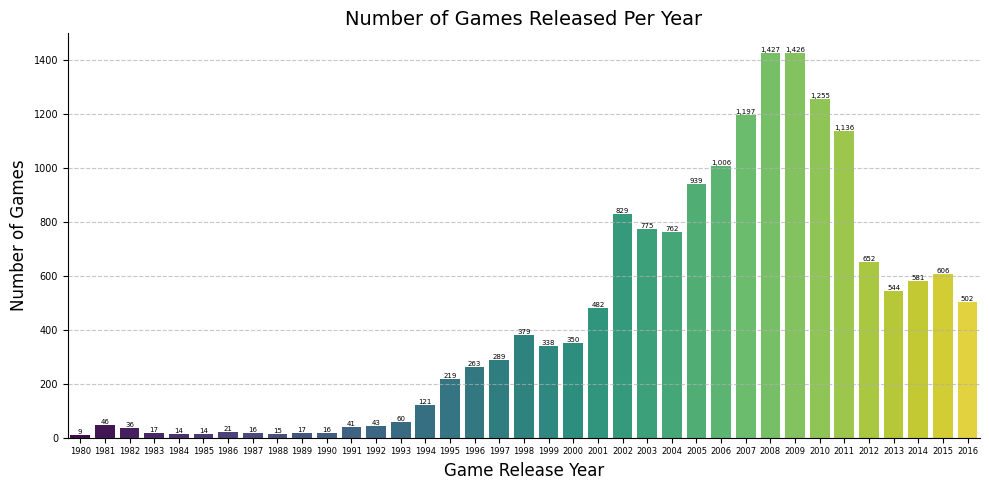

In [26]:
# Number of games released per year
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'game_count']

# Seaborn bar plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=games_per_year,
    x='year_of_release',
    y='game_count',
    palette="viridis",
    hue='year_of_release',
    dodge=False,
    legend=False
)
plt.title('Number of Games Released Per Year', fontsize=14)
plt.xlabel('Game Release Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)

plt.xticks(fontsize=6, rotation=0)  # Adjust x-axis tick label font size
plt.yticks(fontsize=7)  # Adjust y-axis tick label font size
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add labels
for bar, value in zip(plt.gca().patches, games_per_year["game_count"]):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.0f}",
                 ha="center", va="bottom", fontsize=5)

# Display the plot
plt.tight_layout()
plt.show()



Checking for years of significance

Years with less than 1% contribution to total sales:
Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995],
      dtype='int64', name='year_of_release')


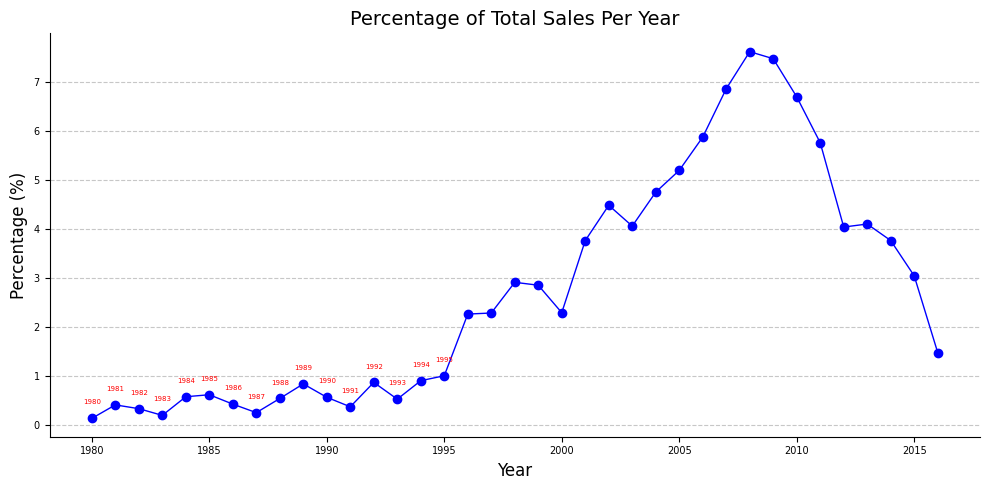

In [27]:
# Check percentage of total sales per year
sales_per_year = df.groupby('year_of_release')['total_sales'].sum()
sales_percentage = (sales_per_year / sales_per_year.sum()) * 100

# Identify years with low contribution (< 1%)
low_contribution_years = sales_percentage[sales_percentage < 1].index
print("Years with less than 1% contribution to total sales:")
print(low_contribution_years)

# Plotting the percentage of total sales per year
plt.figure(figsize=(10, 5))
plt.plot(sales_percentage, marker='o', color='b', linestyle='-', linewidth=1)
plt.title('Percentage of Total Sales Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(fontsize=7, rotation=0)
plt.yticks(fontsize=7)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for year in low_contribution_years:
    plt.annotate(f"{year}", (year, sales_percentage[year]), textcoords="offset points", xytext=(0, 10),
                 ha='center', fontsize=5, color='red')

# Display the plot
plt.tight_layout()
plt.show()

From this initial plot distribution, can only infer that *the highest number of games were released within the 5 year window between 2006 - 2011*. However, using the plot of %age of Total Sales per Year, can be seen that the *years preceding 1996 had less than 1% contribution to total sales*. 

Conclusion here would be that data for years preceding 1996 (1985 - 1995) would not be consider as significant as those for the years 1996 - 2016 for the analysis and modeling for 2017.

### B. Gaming Platform Analysis

#### Total Sales Disbtribution by Platform

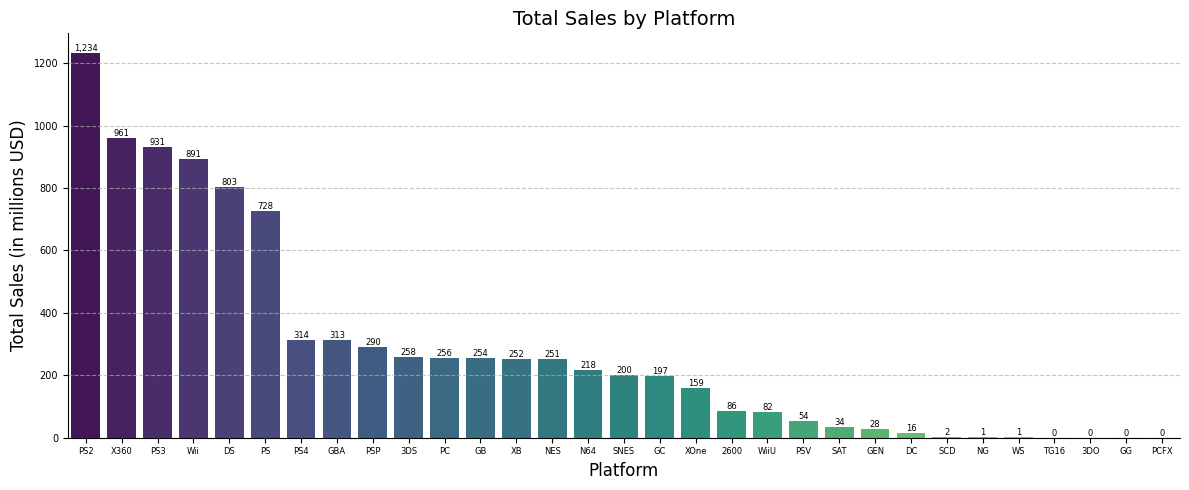

In [28]:
# Sales by platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seaborn bar plot
plt.figure(figsize=(12, 5))
sns.barplot(
    data=platform_sales.reset_index(),
    x='platform',
    y='total_sales',
    palette="viridis",
    hue='platform',
    dodge=False
)
plt.title('Total Sales by Platform', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Sales (in millions USD)', fontsize=12)

plt.xticks(fontsize=6, rotation=0)  # Adjust x-axis tick label font size
plt.yticks(fontsize=7)  # Adjust y-axis tick label font size
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add labels
for bar, value in zip(plt.gca().patches, platform_sales):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.0f}",
                 ha="center", va="bottom", fontsize=6)

# Display the plot
plt.tight_layout()
plt.show()

In [29]:
# Top Performing Platform
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top_platforms = top_platforms.reset_index()

# Rename columns for clarity
top_platforms.columns = ['Platform', 'Total Sales']

top_platforms

,Platform,Total Sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78


#### Top 5 Performing Platforms

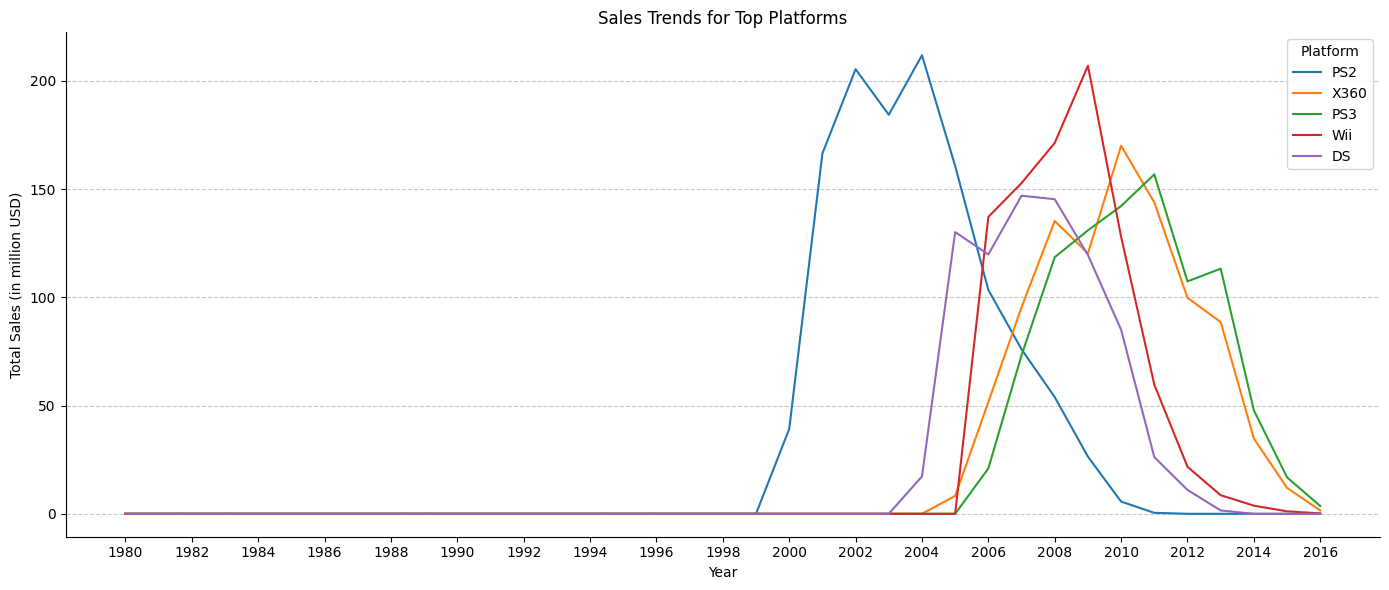

In [78]:
# Plot of Popular Platforms OR Top 5 Platforms by Total Sales
plt.figure(figsize=(14, 6))

# Create a pivot table for total sales by platform and year
sales_by_platform = df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).fillna(0)

# Extract the top platforms list
top_platforms_list = top_platforms['Platform'].tolist()

# Plot the sales trends for the top platforms
for platform in top_platforms_list:
    sns.lineplot(
        x=sales_by_platform.index, 
        y=sales_by_platform[platform], 
        label=platform
    )

# Set x-axis tick values every 2 years
tick_values = list(range(int(sales_by_platform.index.min()), int(sales_by_platform.index.max()) + 1, 2))
plt.xticks(tick_values, [str(year) for year in tick_values], rotation=0)

# Add gridlines

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add titles and labels
plt.title("Sales Trends for Top Platforms")
plt.xlabel("Year")
plt.ylabel("Total Sales (in million USD)")
plt.legend(title="Platform")

# Show the plot
plt.tight_layout()
plt.show()

This plot shows the yearly trend distribution for the top performing platforms. However, all these top platforms appear to have zeroed out in sales performance by 2016.

Will check to know all the platforms that used to be popular but now have zero sales, and how long it generally takes new platforms to appear and old ones to fade.

#### Platform Lifespan, New and Fading Platforms

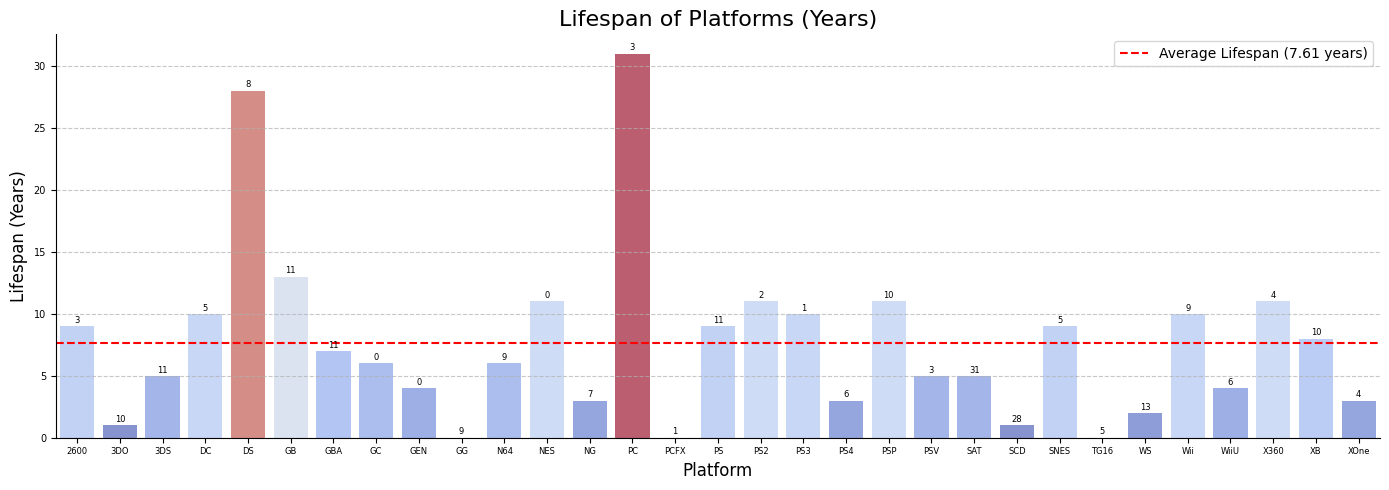

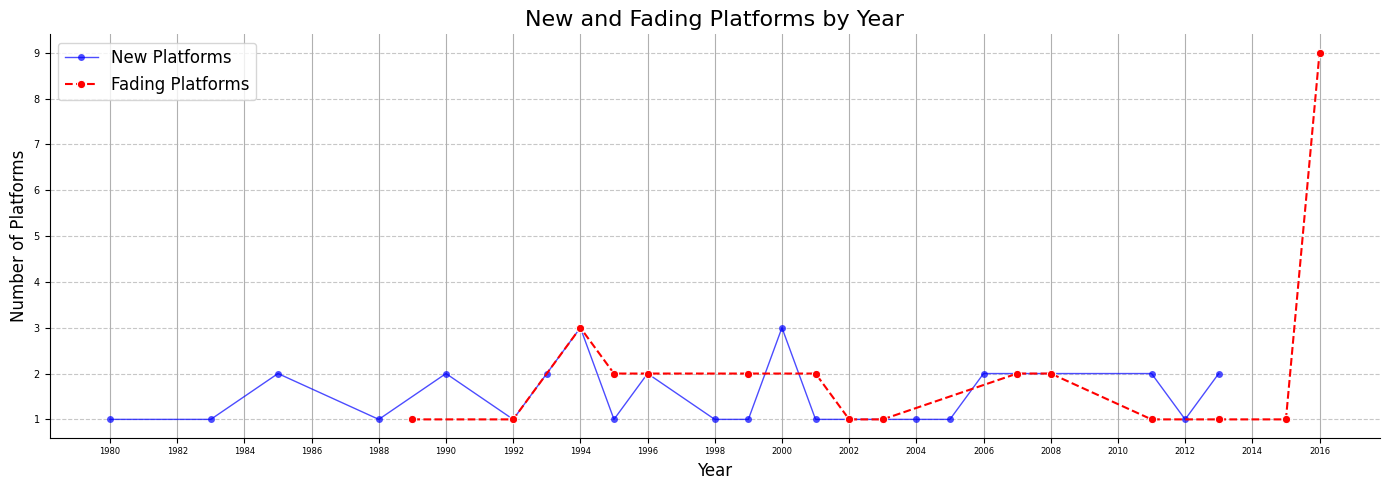

Summary of Findings:
Platforms not yet faded to zero sales:
['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


Platforms that faded before 2016:
['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


Average time for new platforms to be released: 1.10 years OR 13.20 months
The last platform was released in the year: 2013
Average lifespan of platforms: 7.61 years
The oldest platform still active is PC, released in 1985.


In [31]:
# Calculate the first and last year of sales for each platform
platform_last_year = df.groupby('platform')['year_of_release'].max()
platform_first_year = df.groupby('platform')['year_of_release'].min()

# Identify platforms that have faded (last year < max year in dataset)
max_year = df['year_of_release'].max()
faded_platforms = platform_last_year[platform_last_year < max_year]

# Calculate lifespan of each platform
platform_lifespan = platform_last_year - platform_first_year
average_lifespan = platform_lifespan.mean()

# Plot lifespan distribution of platforms
plt.figure(figsize=(14, 5))
sns.barplot(
    x=platform_lifespan.index, 
    y=platform_lifespan.values, 
    palette='coolwarm', 
    hue=platform_lifespan.values, 
    dodge=False, 
    alpha=0.7, 
    legend=False
)
plt.title('Lifespan of Platforms (Years)', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Lifespan (Years)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add average lifespan line
plt.axhline(y=average_lifespan, color='red', linestyle='--', label=f'Average Lifespan ({average_lifespan:.2f} years)')
plt.legend(fontsize=10)

# Rotate x-axis labels
plt.xticks(fontsize=6, rotation=0)  # Adjust x-axis tick label font size
plt.yticks(fontsize=7)  # Adjust y-axis tick label font size
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add labels
for bar, value in zip(plt.gca().patches, platform_lifespan.values):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.0f}",
                 ha="center", va="bottom", fontsize=6)

# Display the plot
plt.tight_layout()
plt.show()

# New platforms and fading platforms by year
new_platforms_by_year = platform_first_year.value_counts().sort_index()
fading_platforms_by_year = platform_last_year.value_counts().sort_index()

# Plot new and fading platforms by year
plt.figure(figsize=(14, 5))
sns.lineplot(x=new_platforms_by_year.index, y=new_platforms_by_year.values, label='New Platforms', marker='o', linestyle='-', color='blue', linewidth=1, alpha=0.7, markersize=5, markerfacecolor='blue', markeredgewidth=0, markeredgecolor='blue')
sns.lineplot(x=fading_platforms_by_year.index, y=fading_platforms_by_year.values, label='Fading Platforms', marker='o', linestyle='--', color='red')
plt.title('New and Fading Platforms by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Platforms', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Rotate x-axis labels
plt.xticks(ticks=list(range(int(new_platforms_by_year.index.min()), int(fading_platforms_by_year.index.max()) + 1, 2)), fontsize=6, rotation=0) # Adjust x-axis to show labels every 2 years
plt.yticks(fontsize=7)  # Adjust y-axis tick label font size
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


# Summary of findings
print("Summary of Findings:")
# Platforms not yet faded to zero sales
latest_year = df['year_of_release'].max()
not_faded_platforms = platform_last_year[platform_last_year == latest_year].index.tolist()
print(f"Platforms not yet faded to zero sales:\n{not_faded_platforms}")
print(f"\n")
# Platforms that faded before the latest year
print(f"Platforms that faded before {max_year}:\n{faded_platforms.index.tolist()}")
print(f"\n")
# Average lifespan of platforms and average time for new platforms to be released
platform_release_years = platform_first_year.sort_values().values
average_release_interval_years = pd.Series(platform_release_years).diff().mean()
average_release_interval_months = average_release_interval_years * 12

# Determine when the last platform was released
last_platform_release_year = platform_first_year.max()

# Average lifespan of platforms
average_lifespan = platform_lifespan.mean()

# Find the oldest platform that is yet to fade
oldest_active_platform = platform_first_year[platform_first_year.index.isin(not_faded_platforms)].idxmin()
oldest_active_platform_year = platform_first_year[oldest_active_platform]

print(f"Average time for new platforms to be released: {average_release_interval_years:.2f} years OR {average_release_interval_months:.2f} months")
print(f'The last platform was released in the year: {last_platform_release_year}')
print(f"Average lifespan of platforms: {average_lifespan:.2f} years")
print(f'The oldest platform still active is {oldest_active_platform}, released in {oldest_active_platform_year}.')





**Analysis Summary:**

Platforms not yet faded to zero sales: 
['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


Platforms that faded before 2016:
['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


- Average time for new platforms to be released: **1.10 years OR 13.20 months**
- The last platform was released in the year: **2013**
- Average lifespan of platforms: **7.61 years**
- The **oldest active platform is PC, released in 1985**.

#### Active Platforms

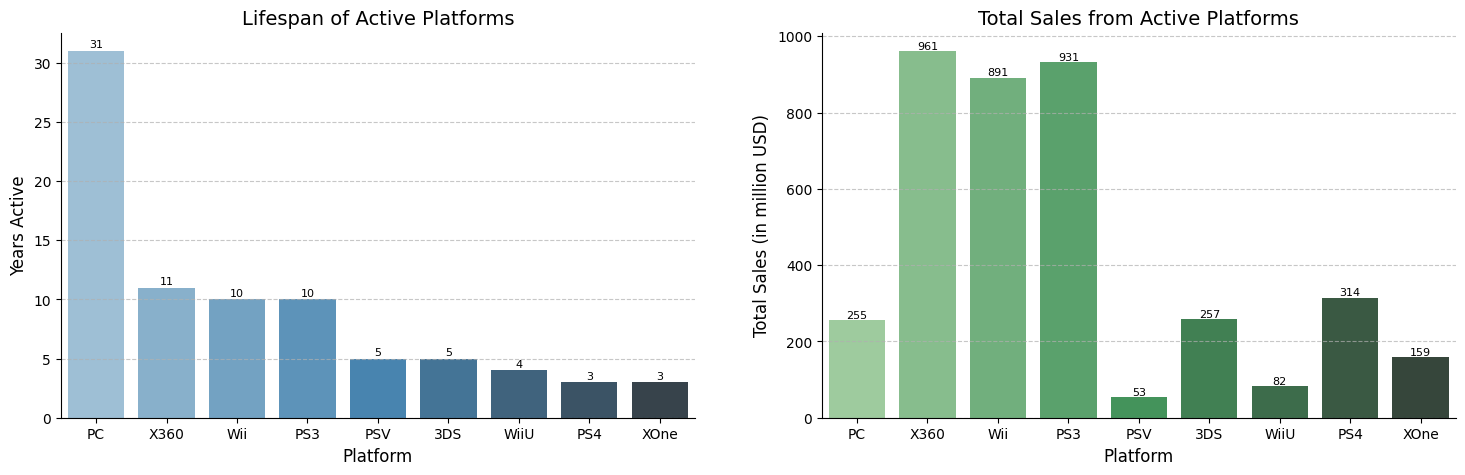

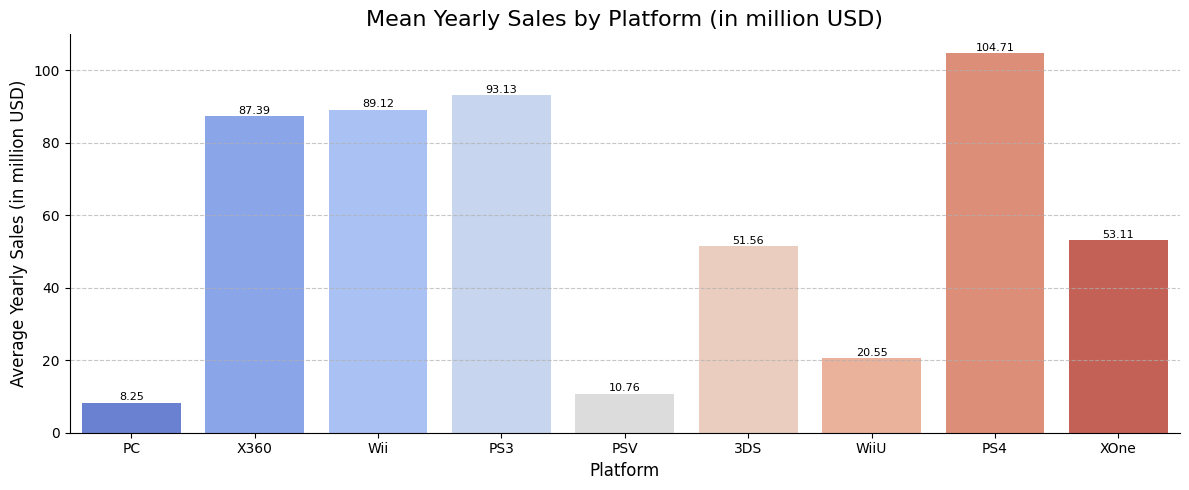

In [32]:
# Plots for Active Platforms
selected_platforms = not_faded_platforms

filtered_data = df[df['platform'].isin(selected_platforms)].groupby('platform').agg({
    'total_sales': 'sum'
}).reset_index()

# Add the platform_lifespan column
filtered_data['platform_lifespan'] = (
    platform_last_year[selected_platforms] - platform_first_year[selected_platforms]
).values

# Add the average yearly sales column
filtered_data['average_yearly_sales'] = (
    filtered_data['total_sales'] / filtered_data['platform_lifespan']
).fillna(0)  # Handle platforms with 0 lifespan

# first year of release
filtered_data['first_year'] = platform_first_year[selected_platforms].values

filtered_data = filtered_data.set_index('platform').sort_values(by='first_year', ascending=True)

# Create subplots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Subplot 1: Platforms vs. Years Active
sns.barplot(data=filtered_data, x='platform', y='platform_lifespan', ax=axes[0], palette='Blues_d', legend=False, dodge=False, hue='platform')
axes[0].set_title('Lifespan of Active Platforms', fontsize=14)
axes[0].set_xlabel('Platform', fontsize=12)
axes[0].set_ylabel('Years Active', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
# Add labels
for bar, value in zip(axes[0].patches, filtered_data["platform_lifespan"]):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{int(value):,}",
                 ha="center", va="bottom", fontsize=8, rotation=0)

# Subplot 2: Platforms vs. Total Sales
sns.barplot(data=filtered_data, x='platform', y='total_sales', ax=axes[1], palette='Greens_d', legend=False, dodge=False, hue='platform')
axes[1].set_title('Total Sales from Active Platforms', fontsize=14)
axes[1].set_xlabel('Platform', fontsize=12)
axes[1].set_ylabel('Total Sales (in million USD)', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
# Add bar labels with values in millions
for bar, value in zip(axes[1].patches, filtered_data["total_sales"]):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{int(value):,}",
                 ha="center", va="bottom", fontsize=8, rotation=0)

# Remove spines (outline box)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(12, 5))
sns.barplot(data=filtered_data, x='platform', y='average_yearly_sales', palette='coolwarm', legend=False, dodge=False, hue='platform')
plt.title('Mean Yearly Sales by Platform (in million USD)', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Yearly Sales (in million USD)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for bar, value in zip(plt.gca().patches, filtered_data["average_yearly_sales"]):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.2f}",
                 ha="center", va="bottom", fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

#### Sales Trend for Active Platforms

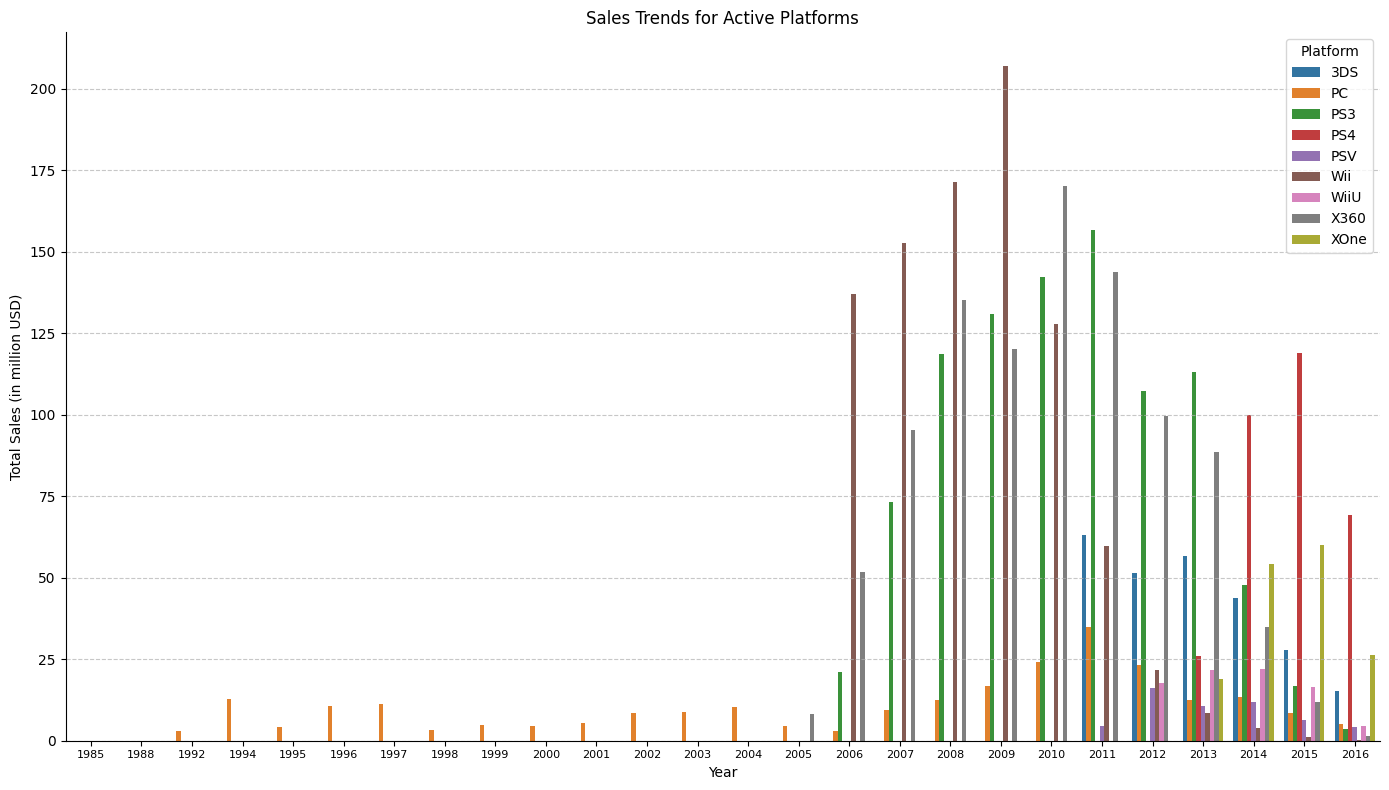

In [74]:
#Plot of Sales Trend for Active Platforms
# Define the list of platforms to filter
active_platforms_list = selected_platforms

# Filter the dataframe to include only rows where platform is in the list
filtered_df = df[df['platform'].isin(active_platforms_list)]

# Create the pivot table for the filtered data
sales_by_platform = filtered_df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).fillna(0)

# Filter the sales data for only the top platforms
sales_by_platform_filtered = sales_by_platform[active_platforms_list].reset_index()

# Melt the data for use with Seaborn
melted_data = sales_by_platform_filtered.melt(
    id_vars='year_of_release', 
    var_name='platform', 
    value_name='total_sales'
)

# Create a bar plot using Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(
    data=melted_data, 
    x='year_of_release', 
    y='total_sales', 
    hue='platform',
)

# Add gridlines and labels
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add titles and labels
plt.title("Sales Trends for Active Platforms")
plt.xlabel("Year")
plt.ylabel("Total Sales (in million USD)")
plt.legend(title="Platform")
plt.xticks(rotation=0, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

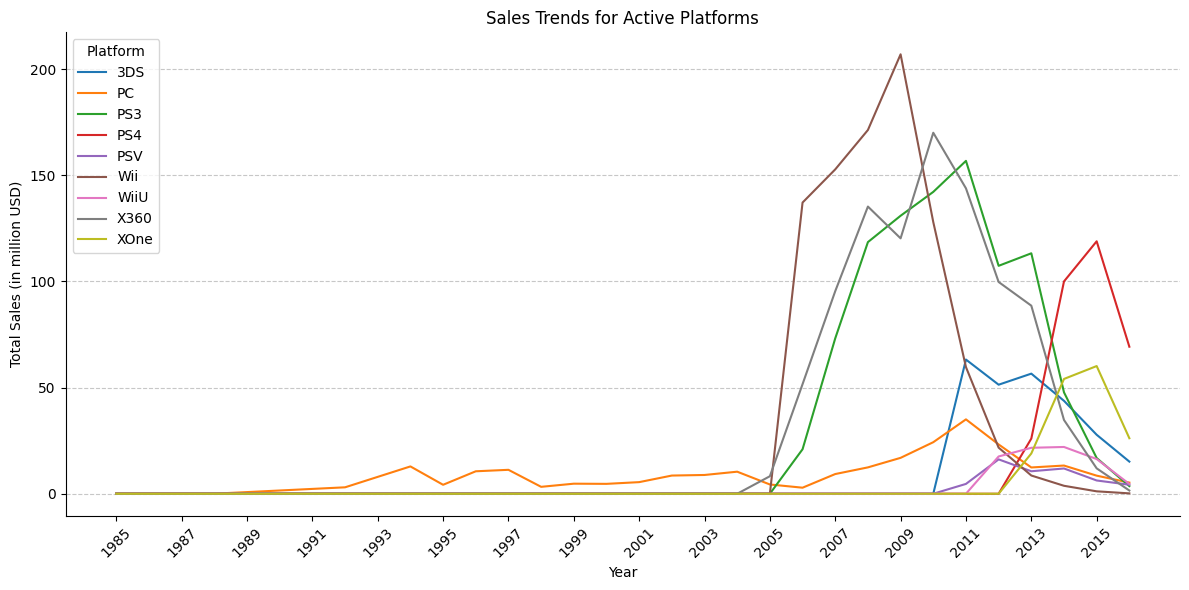

In [67]:
# Define the list of platforms to filter
active_platforms_list = selected_platforms

# Filter the dataframe to include only rows where platform is in the list
filtered_df = df[df['platform'].isin(active_platforms_list)]

# Create the pivot table for the filtered data
sales_by_platform = filtered_df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).fillna(0)

# Plot the sales trends for the active platforms
plt.figure(figsize=(12, 6))

# Plot a line for each platform in the active platforms list
for platform in active_platforms_list:
    sns.lineplot(
        x=sales_by_platform.index, 
        y=sales_by_platform[platform], 
        label=platform
    )

# Set titles and labels
plt.title("Sales Trends for Active Platforms")
plt.xlabel("Year")
plt.ylabel("Total Sales (in million USD)")
plt.legend(title="Platform")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis tick values every 2 years
tick_values = list(range(int(sales_by_platform.index.min()), int(sales_by_platform.index.max()) + 1, 2))
plt.xticks(tick_values, labels=[str(year) for year in tick_values], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Based on Sales Trend of Active Platforms, as most of the historical sales volume was made from year 2006, it would make sense to set the useful period for this review at 2006 - 2016, to forecast for 2017.

However, realizing that the market is dynamic, everything is changing. Some popular genre may not remain popular 10 years later. And vice versa. During this time, several platform generations will change. The industry is evolving, the games are getting better, the graphics is getting better and the users are getting more demanding. Given such, would need fresh information, fresh estimation. To forecast for 2017, then who cares what happened 10 years ago?  Potentially profitable platforms can be easily selected with charts and pivot tables, but user portraits may change. If we look at the very first sales chart, we will see in which year the market stabilized after huge volume sales.     
    
Let's adjust this choice and take years from 2012 or 2013. Years before 2012 have huge sales volume, which can influence our distributions. Moreover, new platforms appeared in 2012-2013, which means that these huge sales were generated by older platforms that cannot be relevant for so many years.  

#### Active Platforms with release year starting from 2012

In [35]:
# Filter the dataframe for active platforms with release year starting from 2006
df_filtered_release_year = df[(df['year_of_release']>= 2012) & (df['platform'].isin(active_platforms_list))]
df_filtered_release_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2681 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2681 non-null   object 
 1   platform         2681 non-null   object 
 2   year_of_release  2681 non-null   int64  
 3   genre            2681 non-null   object 
 4   na_sales         2681 non-null   float64
 5   eu_sales         2681 non-null   float64
 6   jp_sales         2681 non-null   float64
 7   other_sales      2681 non-null   float64
 8   critic_score     1309 non-null   float64
 9   user_score       1523 non-null   float64
 10  rating           2681 non-null   object 
 11  total_sales      2681 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 272.3+ KB


#### Total Sales of Leading Active Platforms

In [36]:
# Aggregate total sales by platform
platform_sales = df_filtered_release_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales = platform_sales.reset_index()
platform_sales.columns = ['platform', 'total_sales']

# Aggregate annual sales by platform to identify trends
annual_sales = df_filtered_release_year.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Calculate the growth/shrinkage of platforms over time
platform_trends = annual_sales.pivot(index='year_of_release', columns='platform', values='total_sales').fillna(0)

# Calculate the growth rate for each platform (relative difference year-to-year)
growth_rate = platform_trends.pct_change().mean().sort_values(ascending=False)

# Identify platforms with positive and negative growth
growing_platforms = growth_rate[growth_rate > 0].index.tolist()
shrinking_platforms = growth_rate[growth_rate < 0].index.tolist()

# Display results
print("Platforms with positive growth:")
print(growing_platforms)

print("\nPlatforms with negative growth:")
print(shrinking_platforms)

# Identify leading platforms
print("\nLeading platforms by total sales:")
platform_sales.head()

Platforms with positive growth:
['PS4', 'XOne']

Platforms with negative growth:
['WiiU', '3DS', 'PSV', 'PC', 'PS3', 'X360', 'Wii']

Leading platforms by total sales:


,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


#### Profitable Active Platforms

In [37]:
# Select potentially profitable platforms
profitable_platforms = platform_sales[platform_sales['platform'].isin(growing_platforms)].sort_values(by=['total_sales'], ascending=False).head()
print("\nPotentially profitable platforms:")
profitable_platforms


Potentially profitable platforms:


,platform,total_sales
0,PS4,314.14
4,XOne,159.32


In [38]:
df_filtered_release_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2012,51.36,23.22,107.35,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Heatmap Plot to visualize the intensity of total sales across platforms and years.

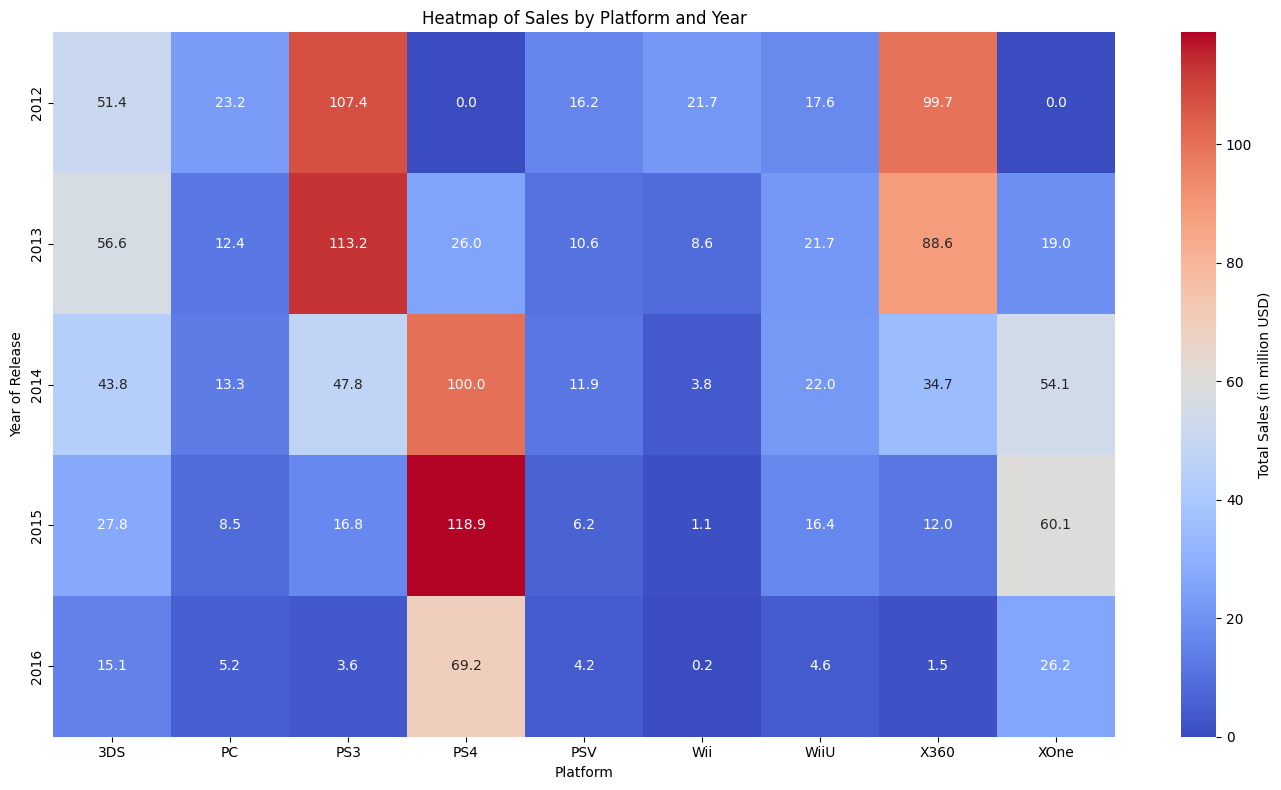

In [83]:
sales_by_platform = df_filtered_release_year.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(sales_by_platform, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Total Sales (in million USD)'})
plt.title('Heatmap of Sales by Platform and Year')
plt.xlabel('Platform')
plt.ylabel('Year of Release')
plt.tight_layout()
plt.show()

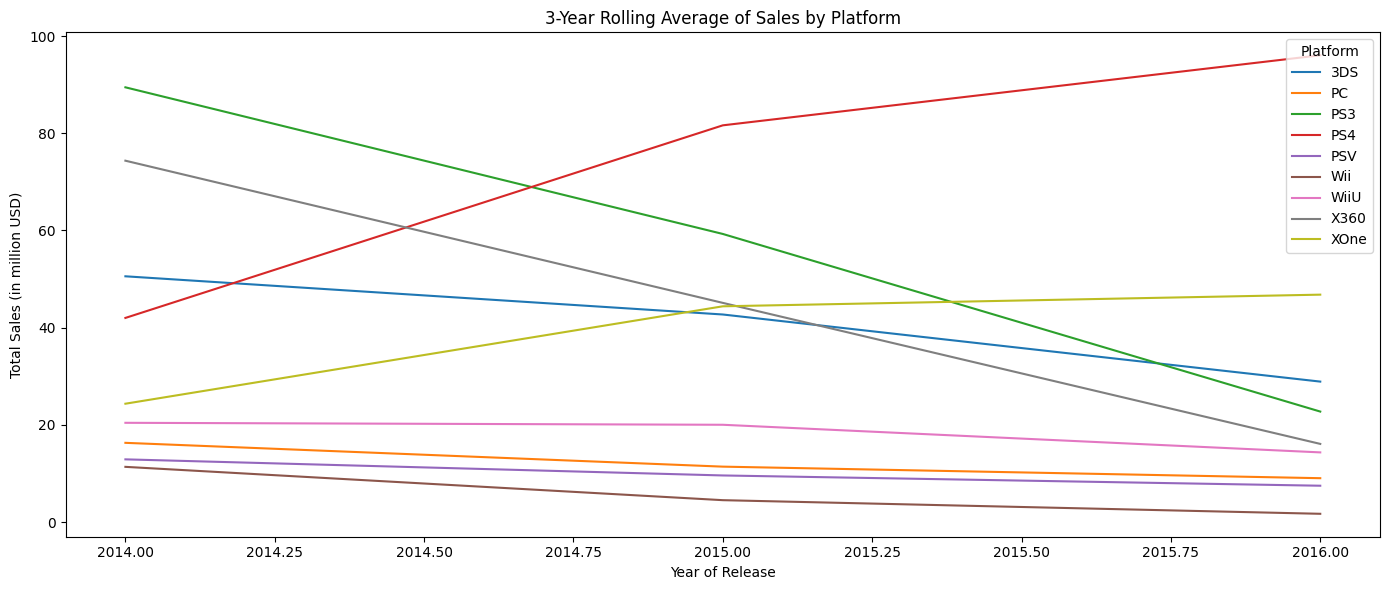

In [87]:
rolling_sales = sales_by_platform.rolling(window=3).mean()

plt.figure(figsize=(14, 6))
for platform in rolling_sales.columns:
    sns.lineplot(x=rolling_sales.index, y=rolling_sales[platform], label=platform)

plt.title('3-Year Rolling Average of Sales by Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in million USD)')
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

#### Global Sales of Active Platforms

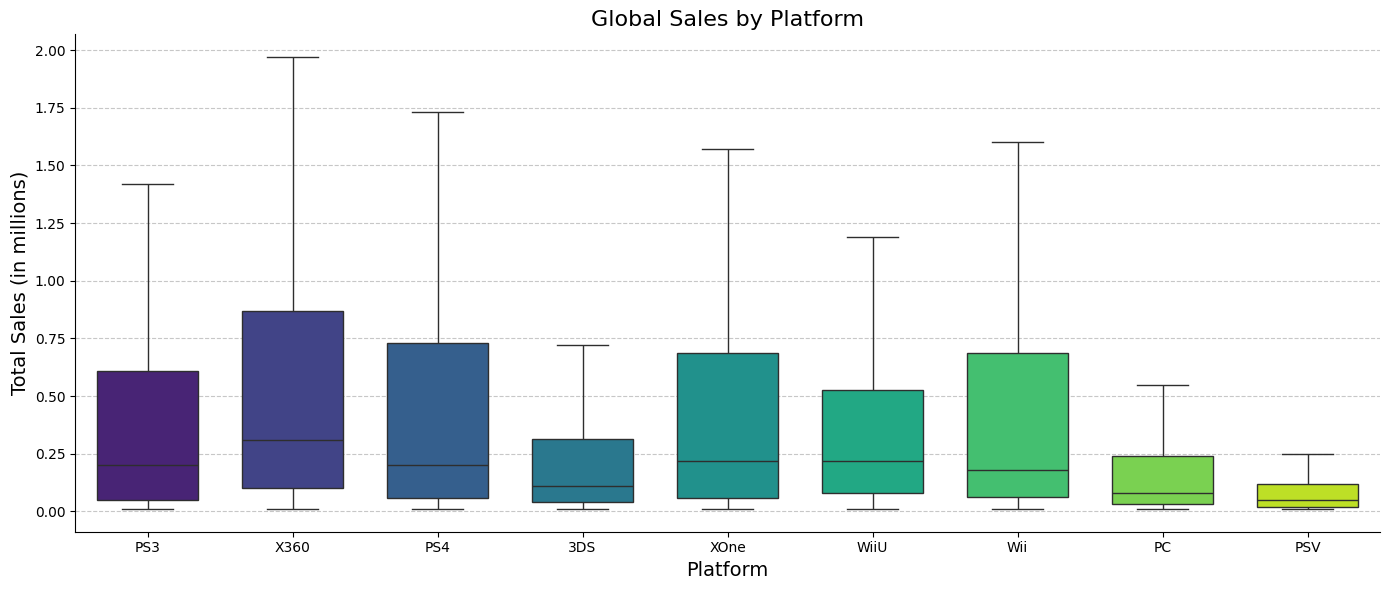

In [49]:
# Box plot for global sales by platform
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_filtered_release_year, 
    x='platform', 
    y='total_sales', 
    showfliers=False,  # Hide outliers for better visualization
    palette='viridis',
    hue='platform',
    dodge=False,
    legend=False,
    linewidth=1,
    saturation=1,
    width=0.7
)
plt.title('Global Sales by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Findings from the Box Plot**
1. ***Sales Variation Across Platforms:***
    - Platforms like Microsoft XBox (X360 or XOne) or Playstation (PS4 or PS3) often show higher median sales compared to others, indicating their dominance during their peak years.
    - Platforms with lower medians and tighter interquartile ranges (IQRs), such as PC or PSV, suggest that their sales are generally less variable and relatively lower.

2. ***Presence of Outliers:***
    - Even without showing outliers, some platforms like X360 or PS3 likely have extreme high sales for blockbuster games.

3. ***Platform Popularity:***
    - Platforms with wider IQRs (e.g., X360, PS4, PS3, XOne) indicate a broader range of game performance, from blockbusters to less popular titles.

4. ***Insights for Marketing:***
    - Platforms with higher medians and wide sales variations should focus on leveraging their blockbuster games to attract more users.
    - Platforms with tighter sales ranges might require more diverse game offerings to boost sales.

**Recommendations:**
1. ***Target Successful Platforms:***
    - Prioritize platforms with higher median sales (e.g., XBox, Playstation, Wii) for game releases and marketing campaigns.

2. ***Leverage High Variability:***
    - For platforms with broader IQRs, focus on promoting blockbuster titles that drive higher-than-median sales.

3. ***Understand Market Dynamics:***
    - Platforms with consistently lower medians (e.g., PC, PSP) may represent niche markets, requiring different strategies like targeting dedicated fans.

#### Correlation Analysis across Platforms to identify platform-specific patterns

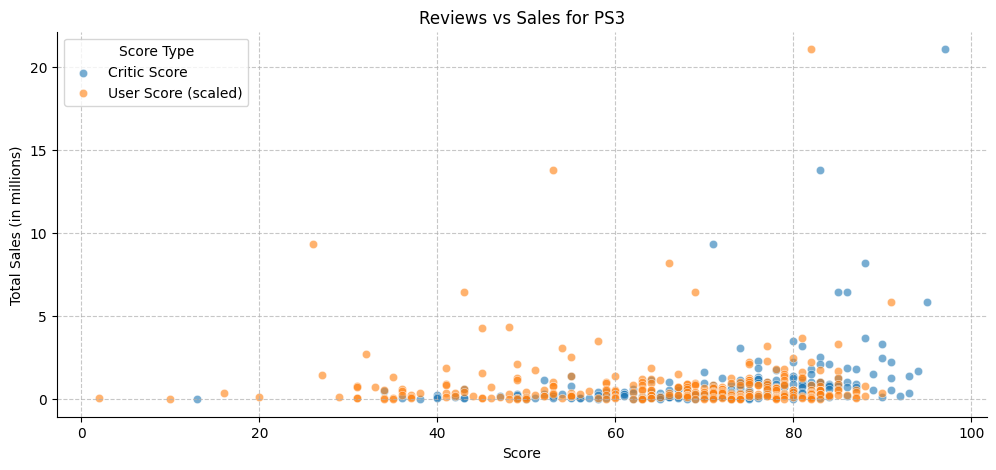

Platform: PS3
Correlation between critic score and sales: 0.3341517575509856
Correlation between user score and sales: -0.0062057676860515325


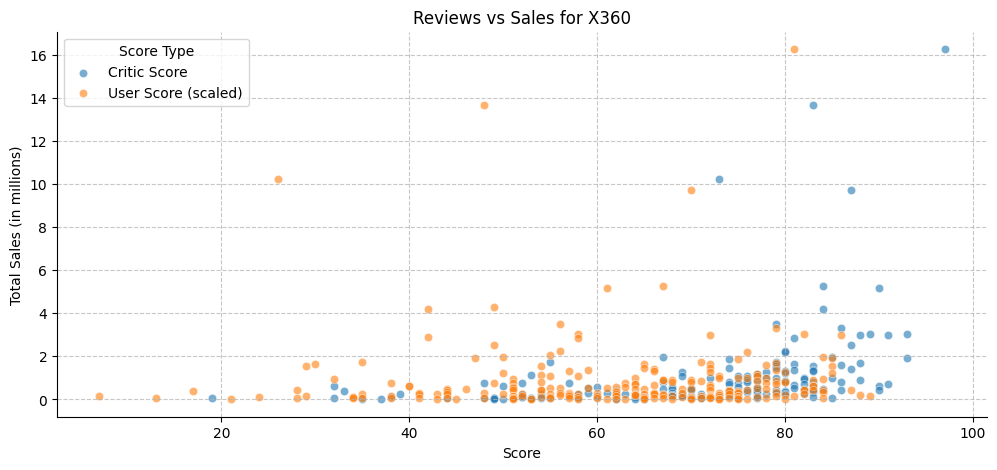

Platform: X360
Correlation between critic score and sales: 0.36057348885073387
Correlation between user score and sales: 0.006163978646213344


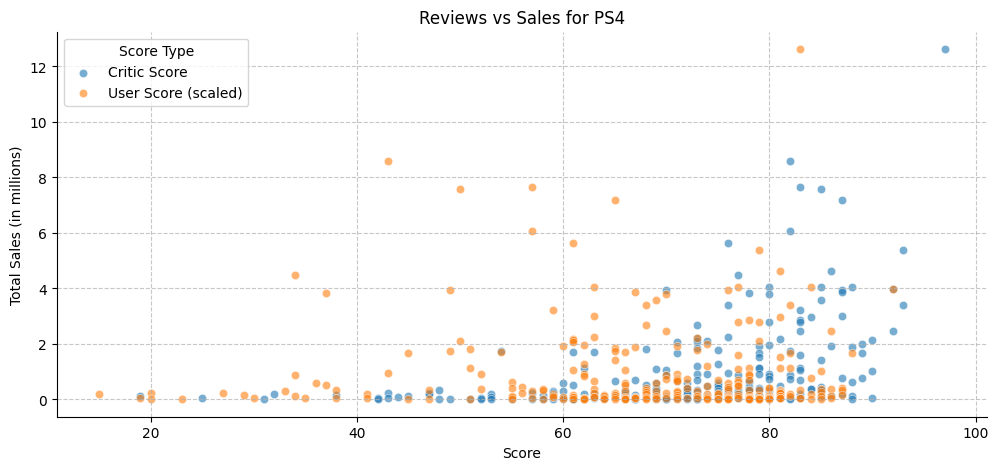

Platform: PS4
Correlation between critic score and sales: 0.40656790206178145
Correlation between user score and sales: -0.03195711020455646


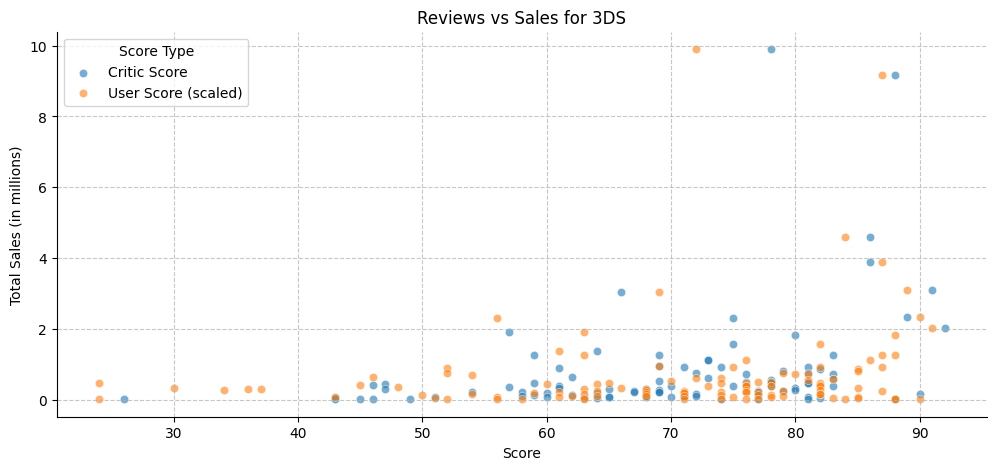

Platform: 3DS
Correlation between critic score and sales: 0.3208028695360786
Correlation between user score and sales: 0.197582634110386


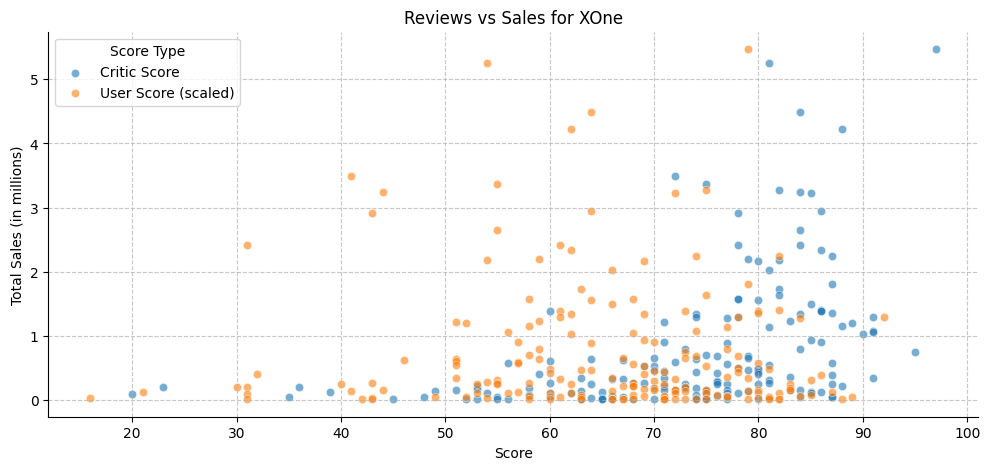

Platform: XOne
Correlation between critic score and sales: 0.41699832800840164
Correlation between user score and sales: -0.06892505328279418


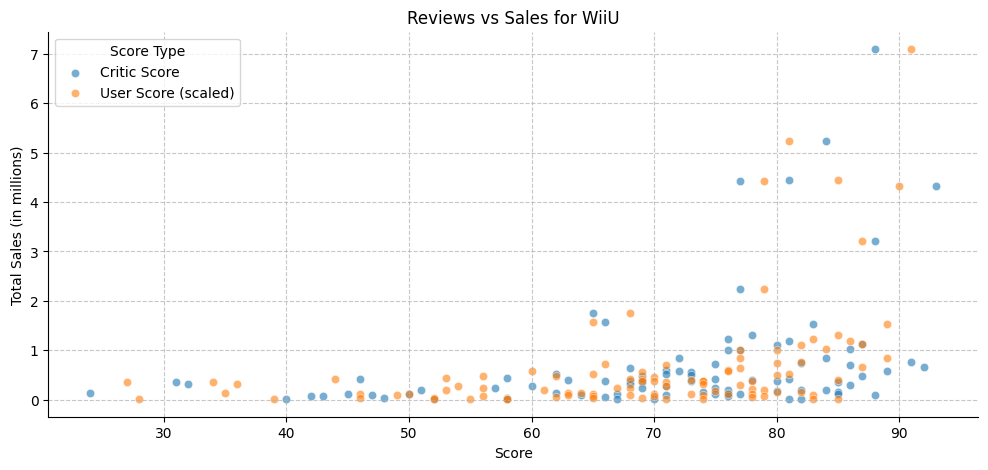

Platform: WiiU
Correlation between critic score and sales: 0.34837976012017485
Correlation between user score and sales: 0.4002190202148617


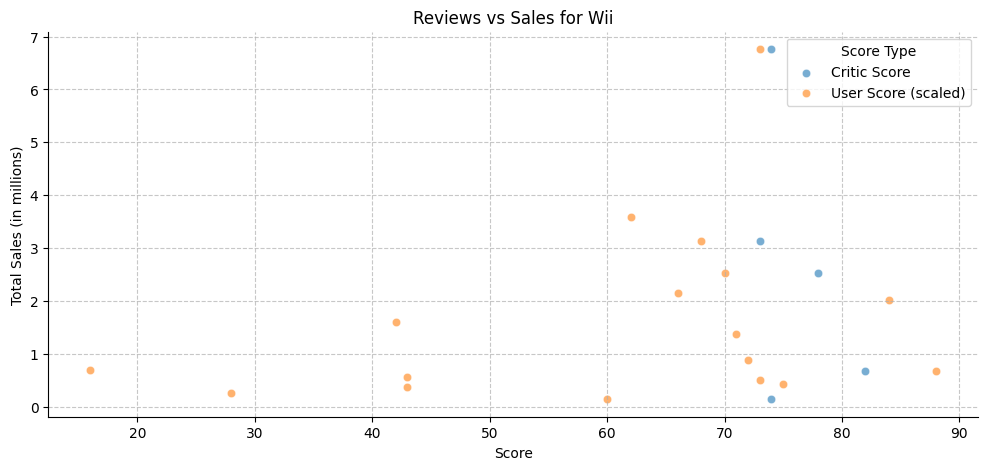

Platform: Wii
Correlation between critic score and sales: -0.4243413011077495
Correlation between user score and sales: 0.29619680007479526


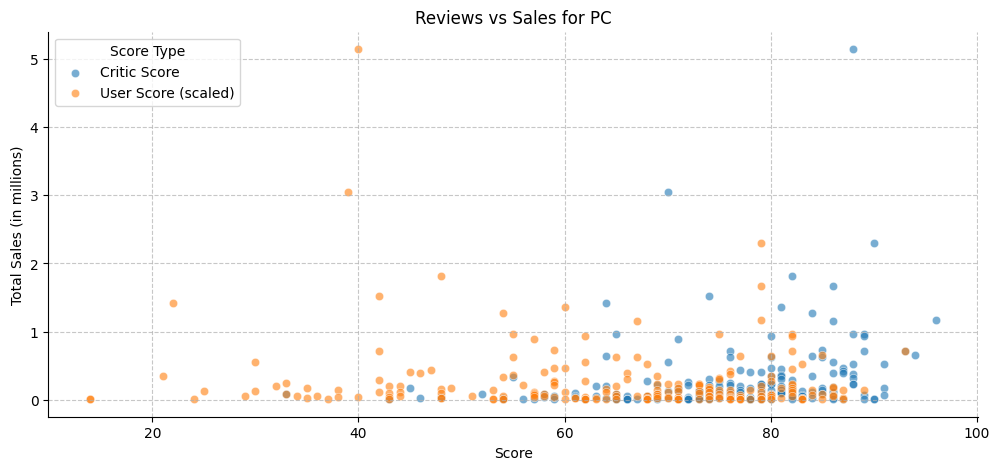

Platform: PC
Correlation between critic score and sales: 0.23724324311567907
Correlation between user score and sales: -0.12186747630735578


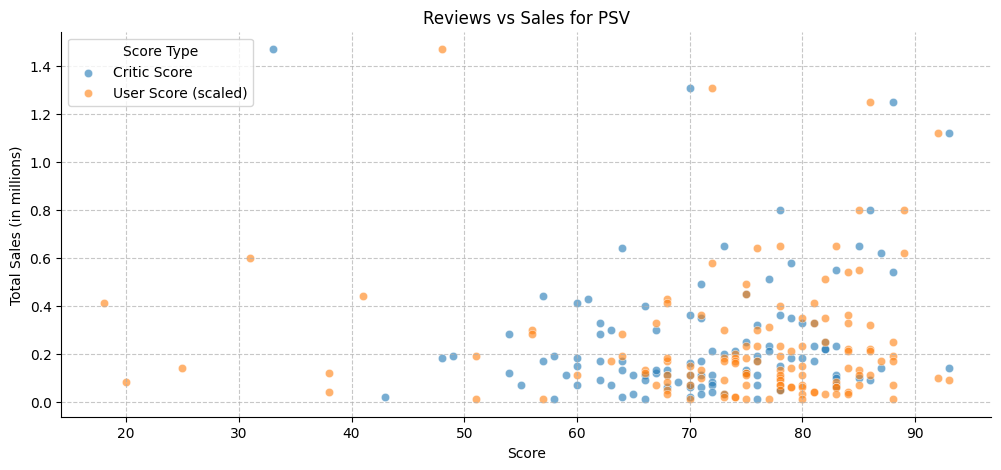

Platform: PSV
Correlation between critic score and sales: 0.09448789929316173
Correlation between user score and sales: -0.004339437514314872
Correlation Summary by Platform:


,Platform,Critic Score Correlation,User Score Correlation
0,PS3,0.334152,-0.006206
1,X360,0.360573,0.006164
2,PS4,0.406568,-0.031957
3,3DS,0.320803,0.197583
4,XOne,0.416998,-0.068925
5,WiiU,0.348380,0.400219
6,Wii,-0.424341,0.296197
7,PC,0.237243,-0.121867
8,PSV,0.094488,-0.004339


In [54]:
# Filter platforms
platforms = df_filtered_release_year['platform'].unique()

# Initialize a summary dataframe to store results
correlation_summary = []

for platform in platforms:
    platform_data = df_filtered_release_year[df_filtered_release_year['platform'] == platform]

    # Drop NaN values for critic_score and total_sales
    critic_data = platform_data[['critic_score', 'total_sales']].dropna()
    critic_scores = critic_data['critic_score']
    sales_for_critic = critic_data['total_sales']

    # Drop NaN values for user_score and total_sales
    user_data = platform_data[['user_score', 'total_sales']].dropna()
    user_scores = user_data['user_score']
    sales_for_user = user_data['total_sales']

    # Calculate correlations
    critic_corr = pearsonr(critic_scores, sales_for_critic)[0] if len(critic_scores) > 1 else None
    user_corr = pearsonr(user_scores, sales_for_user)[0] if len(user_scores) > 1 else None

    # Append to summary
    correlation_summary.append({
        'Platform': platform,
        'Critic Score Correlation': critic_corr,
        'User Score Correlation': user_corr
    })

    # Create scatter plots for the current platform
    plt.figure(figsize=(12, 5))

    # Critic Score vs Total Sales
    sns.scatterplot(x=critic_data['critic_score'], y=critic_data['total_sales'], alpha=0.6, label='Critic Score')

    # User Score vs Total Sales (scaled)
    sns.scatterplot(x=user_data['user_score'] * 10, y=user_data['total_sales'], alpha=0.6, label='User Score (scaled)')

    # Add titles and labels
    plt.title(f'Reviews vs Sales for {platform}')
    plt.xlabel('Score')
    plt.ylabel('Total Sales (in millions)')
    plt.legend(title='Score Type')
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

    # Print correlation results
    print(f'Platform: {platform}')
    print(f'Correlation between critic score and sales: {critic_corr}')
    print(f'Correlation between user score and sales: {user_corr}')

# Convert the summary to a DataFrame
correlation_summary_df = pd.DataFrame(correlation_summary)

# Display the summary
print("Correlation Summary by Platform:")
correlation_summary_df

1. Scatter Plot Analysis
    - Critic Score vs. Total Sales:
        - Points aligned closer to the top-right suggest that higher critic scores are associated with higher sales.
        - If there is a noticeable pattern (e.g., a trend or clustering), it indicates a positive correlation between critic scores and total sales.
    
    - User Score vs. Total Sales:
        - User scores are scaled (multiplied by 10) to align with the critic score scale (out of 100). The scatter plot shows how user reviews relate to total sales.
        - If there is a less clear trend in the scatter plot, user scores may not be as strong an indicator of sales.
    

2. Correlation Analysis - The Pearson correlation coefficients (critic_corr and user_corr) measure the strength of the linear relationship between scores and sales:
    - Correlation range:
        - +1: Perfect positive correlation
        - 0: No correlation
        - -1: Perfect negative correlation
    
    - Critic Score Correlation (critic_corr):
        - A high positive value (e.g., 0.6 or above) indicates that games with higher critic scores tend to sell better.
        - A low or near-zero value suggests that critic scores have little influence on sales.
    
    - User Score Correlation (user_corr):
        - A high positive value would indicate that user scores are also strongly tied to sales.
        - A low or negative value suggests user reviews are less predictive of sales, possibly due to bias or different audience expectations.

**Insights:**

1. ***Platform-Specific Correlations:***
    - Platforms like **PS4** and **XOne** show strong correlations with critic scores.
    - User scores have moderate influence on sales across most platforms, but the effect is weaker than critic scores.

2. ***Visualization:***
    - Scatter plots for each platform help identify patterns specific to certain platforms (e.g., outliers, clustering).

3. ***Targeted Strategies:***
    - Platforms with high critic score correlations can benefit more from marketing strategies emphasizing professional reviews.
    - Platforms with high user score correlations may require engaging community campaigns.

### C. Genre Analysis

#### Total Sales by Genre

<Figure size 1400x400 with 0 Axes>

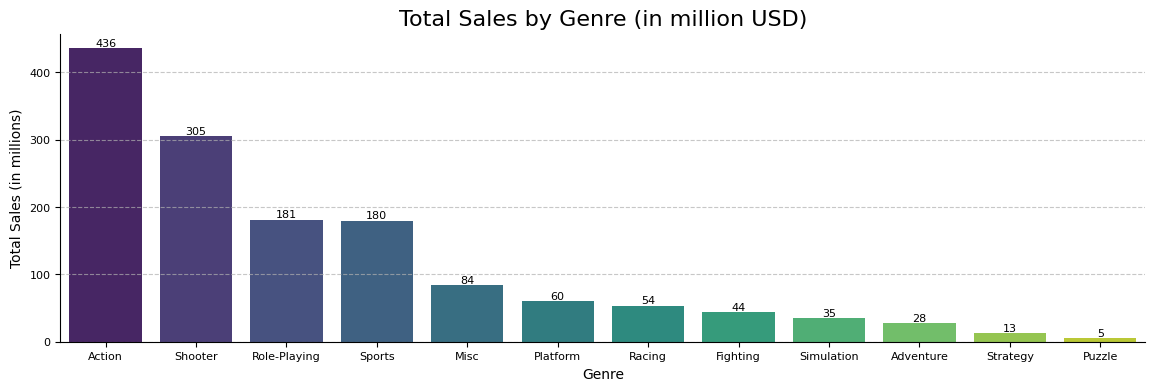

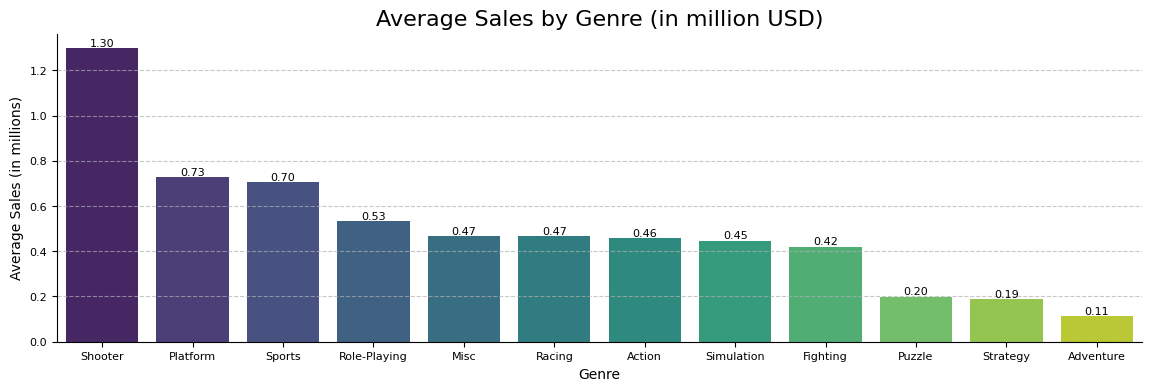

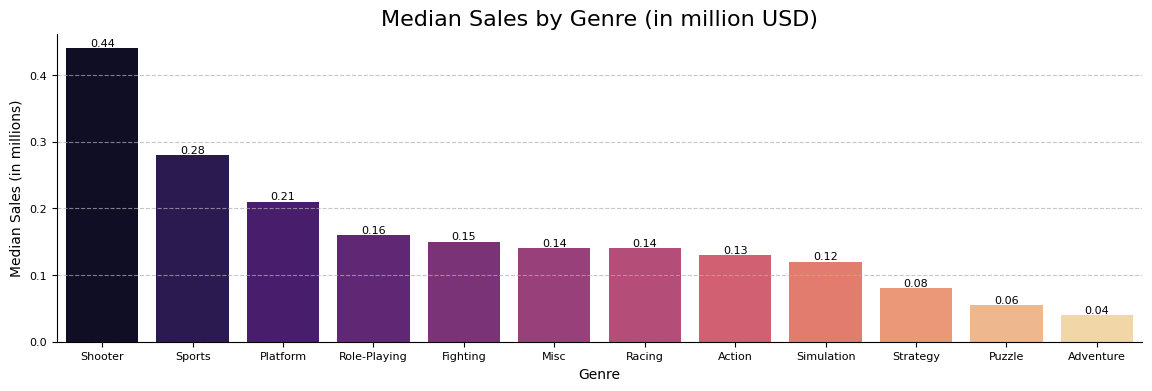

Global Top 3 Highest Selling Genres:


,Total Sales Genre,Sales,Mean Sales Genre,Sales,Median Sales Genre,Sales
0,Action,435.54,Shooter,1.296723,Shooter,0.44
1,Shooter,304.73,Platform,0.726627,Sports,0.28
2,Role-Playing,180.91,Sports,0.704078,Platform,0.21


In [41]:
# Sales by genre
genre_sales = df_filtered_release_year.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 4))
plt.figure(figsize=(14, 4))
sns.barplot(
    data=genre_sales.reset_index(), 
    x='genre', 
    y='total_sales',
    hue='genre',  # Assign `genre` to `hue`
    dodge=False,  # Ensure bars are not split
    palette='viridis',
    legend=False
)
plt.title('Total Sales by Genre (in million USD)', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add labels
for bar, value in zip(plt.gca().patches, genre_sales):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{value:,.0f}",
                 ha="center", va="bottom", fontsize=8)
plt.show()

# Average sales by genre
average_genre_sales = df_filtered_release_year.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 4))
sns.barplot(
    data=average_genre_sales.reset_index(), 
    x='genre', 
    y='total_sales',
    hue='genre',  # Assign `genre` to `hue`
    dodge=False,  # Ensure bars are not split
    palette='viridis',
    legend=False
)
plt.title('Average Sales by Genre (in million USD)', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average Sales (in millions)')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for bar, value in zip(plt.gca().patches, average_genre_sales):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:,.2f}",
                   ha="center", va="bottom", fontsize=8)

plt.show()


# Median sales by genre
median_genre_sales = df_filtered_release_year.groupby('genre')['total_sales'].median().sort_values(ascending=False)

plt.figure(figsize=(14, 4))
sns.barplot(
    data=median_genre_sales.reset_index(), 
    x='genre', 
    y='total_sales',
    hue='genre',  # Assign `genre` to `hue`
    dodge=False,  # Ensure bars are not split
    palette='magma',
    legend=False
)
plt.title('Median Sales by Genre (in million USD)', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Median Sales (in millions)')
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for bar, value in zip(plt.gca().patches, median_genre_sales):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:,.2f}",
                   ha="center", va="bottom", fontsize=8)

plt.show()

# Top 3 genres by sales
top_genres = genre_sales.head(3)
top_genres = top_genres.reset_index()
top_genres.columns = ['Total Sales Genre', 'Sales']

# Bottom 3 genres by sales
bottom_genres = genre_sales.tail(3)
bottom_genres = bottom_genres.reset_index()
bottom_genres.columns = ['Total Sales Genre', 'Bottom Sales']

# Top 3 genres by average sales
top_avg_genres = average_genre_sales.head(3)
top_avg_genres = top_avg_genres.reset_index()
top_avg_genres.columns = ['Mean Sales Genre', 'Sales']

# Bottom 3 genres by average sales
bottom_avg_genres = average_genre_sales.tail(3)
bottom_avg_genres = bottom_avg_genres.reset_index()
bottom_avg_genres.columns = ['Average Sales Genre', 'Mean Sales']

# Top 3 genres by median sales
top_median_genres = median_genre_sales.head(3)
top_median_genres = top_median_genres.reset_index()
top_median_genres.columns = ['Median Sales Genre', 'Sales']

# Bottom 3 genres by median sales
bottom_median_genres = median_genre_sales.tail(3)
bottom_median_genres = bottom_median_genres.reset_index()
bottom_median_genres.columns = ['Median Sales Genre', 'Median Sales']

# Top 3 genres by sales
print(f'Global Top 3 Highest Selling Genres:')
combined_top_summary = pd.concat(
        [top_genres.reset_index(drop=True), top_avg_genres.reset_index(drop=True), top_median_genres.reset_index(drop=True)],
        axis=1
)
combined_top_summary

In [42]:
# Top 3 genres by sales
print(f'Global Bottom 3 Lowest Selling Genres:')
combined_bottom_summary = pd.concat(
        [bottom_genres.reset_index(drop=True), bottom_avg_genres.reset_index(drop=True), bottom_median_genres.reset_index(drop=True)],
        axis=1
)
combined_bottom_summary

Global Bottom 3 Lowest Selling Genres:


,Total Sales Genre,Bottom Sales,Average Sales Genre,Mean Sales,Median Sales Genre,Median Sales
0,Adventure,27.70,Puzzle,0.199583,Strategy,0.080
1,Strategy,12.63,Strategy,0.188507,Puzzle,0.055
2,Puzzle,4.79,Adventure,0.112146,Adventure,0.040


**Summary**

Based on mean or median game sales by genre, Shooter, Sports and Platform games appear to have top sales per unit game in genre. 

#### Correlations for different game genres

In [43]:
# Filter genres
genres = df_filtered_release_year['genre'].unique()

# Initialize a summary dataframe to store results
correlation_summary_genres = []

for genre in genres:
    genre_data = df_filtered_release_year[df_filtered_release_year['genre'] == genre]
    
    # Drop NaN values for critic_score and total_sales
    critic_data = genre_data[['critic_score', 'total_sales']].dropna()
    critic_scores = critic_data['critic_score']
    sales_for_critic = critic_data['total_sales']
    
    # Drop NaN values for user_score and total_sales
    user_data = genre_data[['user_score', 'total_sales']].dropna()
    user_scores = user_data['user_score']
    sales_for_user = user_data['total_sales']
    
    # Calculate correlations
    critic_corr = pearsonr(critic_scores, sales_for_critic)[0] if len(critic_scores) > 1 else None
    user_corr = pearsonr(user_scores, sales_for_user)[0] if len(user_scores) > 1 else None
    
    # Append to summary
    correlation_summary_genres.append({
        'Genre': genre,
        'Critic Score Correlation': critic_corr,
        'User Score Correlation': user_corr
    })

# Convert the summary to a DataFrame
correlation_summary_genres_df = pd.DataFrame(correlation_summary_genres)

# Display the summary
print("Correlation Summary by Genre:")
correlation_summary_genres_df


Correlation Summary by Genre:


,Genre,Critic Score Correlation,User Score Correlation
0,Action,0.358142,0.110555
1,Shooter,0.328088,-0.172266
2,Role-Playing,0.413937,-0.048478
3,Platform,0.226257,0.254833
4,Misc,0.020334,0.069833
5,Simulation,0.267510,0.118540
6,Sports,0.358927,-0.010756
7,Fighting,0.390626,0.216177
8,Racing,0.309225,0.281353
9,Strategy,0.351161,0.126306


**Insights:**
1. ***Games in Genres Sensitive to Critic Scores:***
    - **Puzzle, RPG, Fighting, Sports, Action and Strategy** games have strong positive correlations with critic scores, indicating that high professional reviews significantly drive game sales.

2. ***Genres Sensitive to User Scores:***
    - **Puzzle, Racing, Fighting and Platform** show relatively stronger user score correlations, suggesting that community reviews impact these genres.

3. ***Genres with Weak Correlations:***
    - **Misc** genre show weak correlations for both critic and user scores, indicating sales might be driven by brand recognition or other factors.

**Recommendations:**
- Leverage Critic Scores: Focus on securing strong critic reviews for score-sensitive games.
- Engage the Community: Invest in user engagement campaigns to encourage positive reviews.
- Focus on Brand: For genres like Misc, prioritize marketing and leveraging franchise reputation over review strategies.

# 5. Regional Sales Profiles

### A. Top 5 Platforms and Genres in EU, JP and NA regions

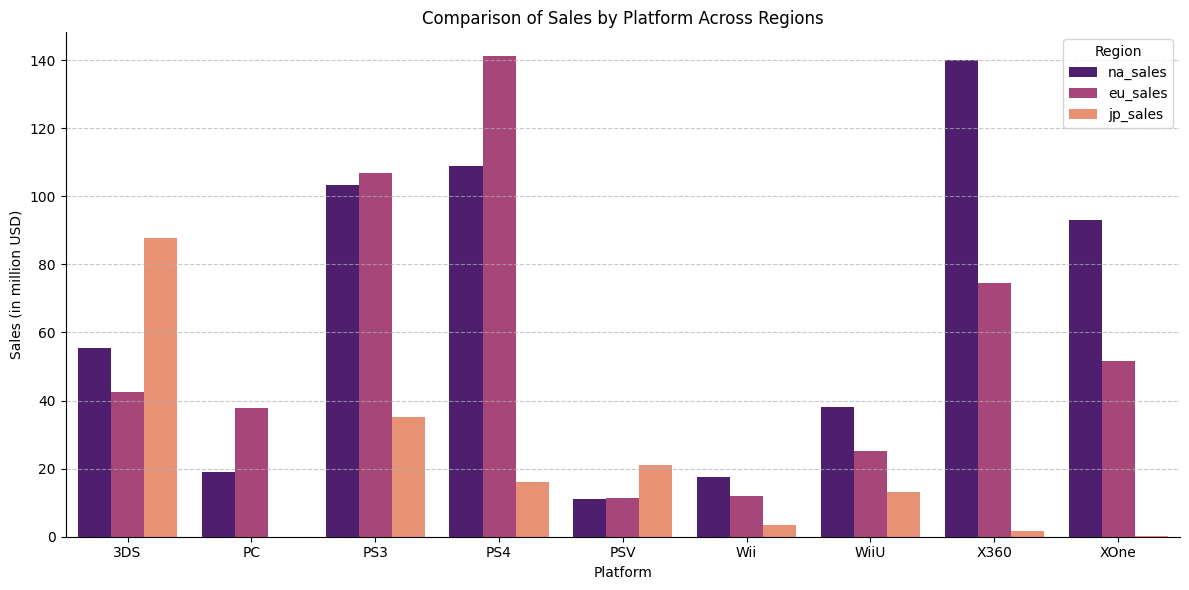

In [65]:
# Comparison of Sales by Platform Across Regions
# Aggregate sales by platform and region
region_sales = df_filtered_release_year.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Melt the data for use with Seaborn
region_sales_melted = region_sales.melt(
    id_vars='platform', 
    var_name='region', 
    value_name='sales'
)

# Create a bar plot to compare sales by platform across regions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_sales_melted, 
    x='platform', 
    y='sales', 
    hue='region',
    palette='magma',
)

# Add titles and labels
plt.title('Comparison of Sales by Platform Across Regions')
plt.xlabel('Platform')
plt.ylabel('Sales (in million USD)')
plt.legend(title='Region')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust x-axis order for better visualization
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


### B. Comparison of Platform and Genre Performance across Regions

In [45]:
# Comparison of Sales by Platform Across Regions
# Aggregate sales by platform and region
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_sales = df_filtered_release_year.groupby('platform')[regions].sum().reset_index()

# Function to provide summary for a specific region
def get_region_summary(region_column):
    # Sort data by the region sales
    region_filtered = df_filtered_release_year.sort_values(by=region_column, ascending=False)
    region_total = region_filtered[region_column].sum()
    
    # Top 5 platforms in the region
    top_platforms = region_filtered.groupby('platform')[region_column].sum().sort_values(ascending=False).head(5)
    top_platforms = top_platforms.reset_index()
    top_platforms.columns = ['Platform', 'Platform Sales']
    top_platforms['Market Share %'] = (top_platforms['Platform Sales'] / region_total) * 100

    # Top 5 genres in the region
    top_genres = region_filtered.groupby('genre')[region_column].sum().sort_values(ascending=False).head(5)
    top_genres = top_genres.reset_index()
    top_genres.columns = ['Genre', 'Genre Sales']

    # Merge the two dataframes
    merged_summary = pd.concat(
        [top_platforms.reset_index(drop=True), top_genres.reset_index(drop=True)],
        axis=1
    )
    return merged_summary

# Create summaries for each region
na_summary = get_region_summary('na_sales')
eu_summary = get_region_summary('eu_sales')
jp_summary = get_region_summary('jp_sales')

# Display summaries
print("North America Summary:")
print(na_summary)
print("\n")

print("Europe Summary:")
print(eu_summary)
print("\n")

print("Japan Summary:")
print(jp_summary)

print("\n")
print("Description of output for Each Region:")
print("-" * 50)
print("Platform: Name of the platform.")
print("Platform Sales: Total Platform sales in that region.")
print("Market Share %: The platform's share of total sales in the region.")
print("Genre: Name of the genre.")
print("Genre Sales: Total Genre sales in that region.")

North America Summary:
  Platform  Platform Sales  Market Share %         Genre  Genre Sales
0     X360          140.05       23.889126        Action       177.00
1      PS4          108.74       18.548401       Shooter       144.77
2      PS3          103.38       17.634115        Sports        81.38
3     XOne           93.12       15.884009  Role-Playing        60.65
4      3DS           55.31        9.434542          Misc        38.13


Europe Summary:
  Platform  Platform Sales  Market Share %         Genre  Genre Sales
0      PS4          141.09       28.057511        Action       158.43
1      PS3          106.85       21.248459       Shooter       113.47
2     X360           74.52       14.819234        Sports        68.83
3     XOne           51.59       10.259317  Role-Playing        46.76
4      3DS           42.64        8.479497        Racing        27.29


Japan Summary:
  Platform  Platform Sales  Market Share %         Genre  Genre Sales
0      3DS           87.79      

#### Summary and Insights from Platform Variation Analysis across Regions

**Summary**
- *North America (NA):*
    - Platforms like PS4 and XOne dominate.

- *Europe (EU):*
    - Sony platforms (e.g., PS4, PS3) generally perform better in Europe.

- *Japan (JP):*
    - Nintendo platforms (e.g., 3DS) dominate due to regional preferences.
    - Sony platforms are also strong, while Microsoft's platforms are unlikely to have a substantial share in the market.

**Insights from Platform Variation across Regions**
- *Market Trends*: Regional preferences greatly influence platform success (e.g., Microsoft Xbox and Sony Playstation in North America and Europe, Nintendo and Sony in Japan).
- *Marketing Strategies*: Allocate marketing efforts to platforms that are regionally dominant to maximize returns.

#### Summary and Insights from Genre Analysis across Regions

**Summary**

The top five genres in North America (NA), Europe (EU), and Japan (JP) often reflect cultural preferences and gaming habits unique to each region. Here's a breakdown based on typical trends from global gaming data:

1. *North America (NA):*
- Preference for realistic, high-intensity genres like Action, Shooter and Sports. Action-packed gameplay resonates well with the NA audience.
- Strong interest in Western-developed games with immersive storylines and multiplayer modes.
- Sporting games like Madden NFL and NBA 2K dominate, reflecting the region's love for sports.
- Role-Playing (RPG) are well-received, but less dominant than in Japan.


2. *Europe (EU):*
- Similar to NA, action games dominate with franchises like Assassin's Creed being highly popular.
- Strong interest in Sports due to football (soccer) culture (FIFA reigns supreme). Titles like FIFA are hugely dominant in Europe.
- Racing genres, particularly Formula 1-themed games, perform better in Europe than in NA or JP.


3. *Japan (JP):*
- Role-Playing (RPG) dominate the Japanese market due to a historical preference for immersive, narrative-rich games.
- Action and Fighting games are popular in Japan.


**Insights from Genre Analysis across EU, NA and JP Regions**

***Cultural Influence:***
- Action and Shooter preferences in NA and EU, could likely be influenced by cultural likeness for thrills, adventure, combat, confrontation. It could seemingly relate to why North America is usually called the Wild West.
- Sports dominance in NA and EU, could be influenced by local sporting events and motorsport culture.
- Japan leans heavily toward RPGs games due to historical industry focus and cultural gaming preferences.

***Localization Strategies:***
- Developers must tailor their game releases and marketing strategies to align with regional tastes.
- For example:
    - Focus on FIFA in Europe.
    - Emphasize RPGs in Japan.
    - Highlight Shooters in North America.

***Market Potential:***
- The dominance of genres like RPGs in Japan and Shooter, Sports in Europe and North America highlights opportunities for regional exclusives or partnerships.

### C. ESRB ratings impact on sales in individual regions.

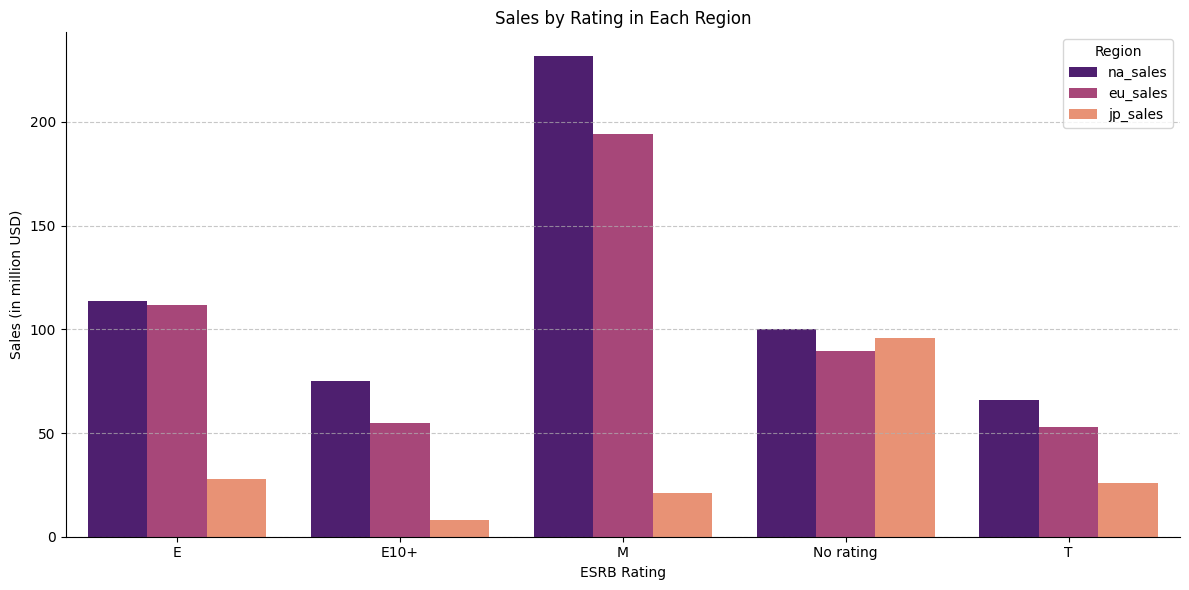

ANOVA Test for Ratings Effect on Sales in Each Region:
na_sales: F-statistic = 40.48, p-value = 0.0000
  --> Ratings significantly affect na_sales sales.
eu_sales: F-statistic = 37.17, p-value = 0.0000
  --> Ratings significantly affect eu_sales sales.
jp_sales: F-statistic = 5.35, p-value = 0.0003
  --> Ratings significantly affect jp_sales sales.


In [63]:
# Aggregate sales by rating and region
regions = ['na_sales', 'eu_sales', 'jp_sales']
ratings_sales = df_filtered_release_year.groupby('rating')[regions].sum().reset_index()

# Melt the data for visualization
ratings_sales_melted = ratings_sales.melt(
    id_vars='rating', 
    var_name='region', 
    value_name='sales'
)

# Create a bar plot to visualize sales by rating in each region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ratings_sales_melted, 
    x='rating', 
    y='sales', 
    hue='region',
    palette='magma',
)

# Add titles and labels
plt.title('Sales by Rating in Each Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (in million USD)')
plt.legend(title='Region')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Statistical Testing
print("ANOVA Test for Ratings Effect on Sales in Each Region:")

for region in regions:
    sales_by_rating = [
        df_filtered_release_year[df_filtered_release_year['rating'] == r][region].dropna() 
        for r in df_filtered_release_year['rating'].unique()
    ]
    f_stat, p_value = f_oneway(*sales_by_rating)
    print(f"{region}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"  --> Ratings significantly affect {region} sales.")
    else:
        print(f"  --> Ratings do not significantly affect {region} sales.")


**Insights:**
- **North America**:
    - Mature(M) rating is strongest driver of sales, indicating that these games cater to the region's preferences.
- **Europe**: 
    - Similar to North America, Mature(M) rating is strongest driver of sales, indicating that these games cater to the region's preferences.
- **Japan**: 
    - Excluding the "No rating" category, Everyone(E) and Teen (T) rated games are the strongest driver of sales, reflecting a cultural preference for family-friendly content.

# 6. Hypothesis Testing

Will be performing hypothesis tests using t-tests for comparing means, based on the following parameters:

**Hypothesis 1: Xbox One vs PC user ratings**
- *Null Hypothesis (H₀)*: The average user ratings of the Xbox One (XOne) and PC platforms are the same.
- *Alternative Hypothesis (H₁)*: The average user ratings of the Xbox One (XOne) and PC platforms are different.

**Hypothesis 2: Action vs Sports genres**
- *Null Hypothesis (H₀)*: The average user ratings for the Action and Sports genres are the same.
- *Alternative Hypothesis (H₁)*: The average user ratings for the Action and Sports genres are different.

**Significance Level (α):**
- Set α = 0.05 (5%) to test the hypotheses. This threshold balances the risk of Type I error (false positive) and Type II error (false negative).

In [47]:
# Hypothesis 1: Xbox One vs PC
xone_ratings = df_filtered_release_year[df_filtered_release_year['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_filtered_release_year[df_filtered_release_year['platform'] == 'PC']['user_score'].dropna()

# Perform t-test
t_stat_1, p_value_1 = ttest_ind(xone_ratings, pc_ratings, equal_var=False)

# Hypothesis 2: Action vs Sports
action_ratings = df_filtered_release_year[df_filtered_release_year['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df_filtered_release_year[df_filtered_release_year['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_stat_2, p_value_2 = ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Results
print("Hypothesis 1: Xbox One vs PC")
print(f"T-statistic: {t_stat_1:.2f}, P-value: {p_value_1:.4f}")
if p_value_1 < 0.05:
    print("Reject the null hypothesis: The average user ratings for Xbox One and PC are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for Xbox One and PC are the same.")

print("\nHypothesis 2: Action vs Sports")
print(f"T-statistic: {t_stat_2:.2f}, P-value: {p_value_2:.4f}")
if p_value_2 < 0.05:
    print("Reject the null hypothesis: The average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same.")

Hypothesis 1: Xbox One vs PC
T-statistic: 0.60, P-value: 0.5490
Fail to reject the null hypothesis: The average user ratings for Xbox One and PC are the same.

Hypothesis 2: Action vs Sports
T-statistic: 9.84, P-value: 0.0000
Reject the null hypothesis: The average user ratings for Action and Sports genres are different.


**Interpretation of Results**

***For Hypothesis 1:***
- If the p-value < 0.05: Reject H₀: The average user ratings for Xbox One and PC platforms are different.
- If the p-value ≥ 0.05: Fail to reject H₀: The average user ratings for Xbox One and PC platforms are the same.

***For Hypothesis 2:***
- If the p-value < 0.05: Reject H₀: The average user ratings for Action and Sports genres are different.
- If the p-value ≥ 0.05: Fail to reject H₀: The average user ratings for Action and Sports genres are the same.

#### Insights from Ratings Testing

**Xbox One vs PC:** 
- Accepting the null hypothesis implies that there is no statistically significant difference between the average user score ratings of games on Xbox One and PC. Users perceive the quality of games on both platforms as comparable in terms of their ratings.
- Ratings alone are unlikely to sway users toward one platform over the other. Other factors like game exclusivity, platform features, and performance might have more influence.
- For games released on both platforms, prioritize consistent quality rather than overinvesting in platform-specific enhancements aimed solely at improving user ratings. Developers and publishers might not need to differentiate their strategies for Xbox One and PC in terms of user ratings. Instead, they can focus on platform-specific features, hardware capabilities, or target audience preferences unrelated to perceived quality.

**Action vs Sports:**
- Significant difference in user preferences between Action and Sports games. 


# 7. Conclusion

In conclusion, this project analyzed video game sales data to uncover patterns and factors influencing a game's commercial success. Through comprehensive data cleaning, exploration, and analysis, several insights were obtained, providing actionable recommendations for optimizing platform strategies, targeting specific genres, and tailoring regional campaigns.

### Key Findings

**Platform Analysis:**
- Platforms like PS4, XOne, and Wii demonstrated consistently high global sales, with PS4 and XOne showing strong growth potential.
- Older platforms, such as PS2, while historically significant, had faded in relevance as new platforms dominate the market.
- Variability in sales across platforms highlights the need for tailored marketing strategies, with blockbuster games being key drivers for certain platforms.

**Genre Insights:**
- Action, Shooter, and RPG genres emerged as the most profitable globally, with Sports being a strong performer in Europe due to the popularity of football games like FIFA.
- Regional preferences for genres were distinct:
    - *North America*: Strong preference for Action, Shooters and Sports.
    - *Europe*: Dominance of Sports and Action games.
    - *Japan*: High affinity for RPGs and Action genres, reflecting cultural gaming trends.

**Impact of Reviews:**
- Critic scores showed a moderate to strong correlation with sales across most platforms and genres, indicating their influence on consumer purchasing decisions.
- User scores, while slightly less impactful, were still relevant for genres like RPGs, where community engagement plays a larger role.

**Regional Profiles:**
- North America: Dominated by PS3/PS4, X360/XOne, and Wii, with an emphasis on Action, Shooter and Sports genres.
- Europe: Similar platform preferences to North America.
- Japan: Preference for handheld and Nintendo platforms like 3DS and Switch, with RPGs games being the most popular.

**Hypothesis Testing:**
- There is no statistically significant difference between the average user score ratings of games on Xbox One and PC. Users perceive the quality of games on both platforms as comparable in terms of their ratings. Ratings alone are unlikely to sway users toward one platform over the other. Other factors like game exclusivity, platform features, and performance might have more influence.
- Average user ratings for Action and Sports genres also differed significantly, reflecting varied audience preferences for these genres

### Recommendations

**Platform Strategies:**
- Prioritize game releases on platforms with strong sales trends, such as XBox, Playstation and Switch, while considering regional platform preferences.
- For declining platforms, explore opportunities for remastered versions of popular games to attract nostalgic players.
- For games released on XOne platform, prioritize consistent quality rather than overinvesting in platform-specific enhancements aimed solely at improving user ratings. Developers and publishers might not need to differentiate their strategies for Xbox One in terms of user ratings. Instead, they can focus on platform-specific features, hardware capabilities, or target audience preferences unrelated to perceived quality.
- Explore other factors (e.g., sales, critic reviews, or regional popularity) to further differentiate platform strategies.

**Genre Focus:**
- Invest heavily in Action, Shooter, and RPG games, which consistently perform well across regions.
- Leverage regional preferences by focusing on Sports in Europe and RPGs in Japan.

**Review Optimization:**
- Secure positive critic reviews for platform and genre combinations with strong score sensitivity, such as Shooters and Action games on PS4.
- Encourage user engagement through community-focused campaigns for RPGs games.

**Regional Marketing:**
- Design region-specific advertising campaigns:
- Highlight Action and Shooter games in North America.
- Focus on Sports games in Europe, leveraging partnerships with football events.
- Promote RPGs games in Japan.

**ESRB Impact on Sales:**
- Focus on Mature (M) games for North America, especially on platforms like PS4 and Xbox.
- Prioritize E (Everyone) games in Europe to cater to the region’s diverse preferences.
- Develop more E-rated and Teen (T) games for Japan, leveraging family-friendly genres and Nintendo platforms.

### Future Steps

- Analyze data for post-2016 trends to refine recommendations and adapt to emerging platforms like PS5 or Xbox Series X.
- Investigate other potential factors influencing sales, such as in-game monetization models, DLCs, and subscription services.